# **How to collect and analyze text from social media (2) Topic Modeling**
created by. Yoonwon Jung  
email: ywjung@snu.ac.kr  
Reserachgate: https://www.researchgate.net/profile/Yoonwon-Jung

# Topic Modeling을 위한 Text Preprocessing

### 두 개의 subreddit에서 각각 dataframe을 불러와 subreddit칼럼 추가하기

In [3]:
import pandas as pd

loneliness_12to1= pd.read_csv('C:\\Users\\lovel\\Documents\\hfpsych\\Loneliness_Web-scrap\\12~1_loneliness_subreddit.csv', encoding='utf-8', sep=',', na_values=['NULL'])

loneliness_12to1['subreddit']= 'loneliness'

idx_deleted = loneliness_12to1[loneliness_12to1['Body']=="[removed]"].index
loneliness_12to1 = loneliness_12to1.drop(idx_deleted)

from nltk import word_tokenize
loneliness_12to1['Title_wordcounts']= loneliness_12to1.Title.apply(lambda x: len(str(x).split(' ')))
loneliness_12to1['Body_wordcounts']= loneliness_12to1.Body.apply(lambda x: len(str(x).split(' ')))

import numpy as np
loneliness_12to1['Body_wordcounts'].replace("NaN", np.nan)

for i in loneliness_12to1.index:
    if pd.isnull(loneliness_12to1.at[i,"Body"]) == True:
        loneliness_12to1.at[i,"Body_wordcounts"] = 0
        
loneliness_12to1=loneliness_12to1.reset_index(drop=True)

loneliness_12to1

FileNotFoundError: ignored

In [ ]:
import pandas as pd

lonely_12to1= pd.read_csv('C:\\Users\\lovel\\Documents\\hfpsych\\Loneliness_Web-scrap\\12~1_lonely_subreddit.csv', encoding='utf-8', sep=',', na_values=['NULL'])

lonely_12to1['subreddit']= 'lonely'

idx_deleted = lonely_12to1[lonely_12to1['Body']=="[deleted]"].index
lonely_12to1 = lonely_12to1.drop(idx_deleted)
idx_removed = lonely_12to1[lonely_12to1['Body']=="[removed]"].index
lonely_12to1 = lonely_12to1.drop(idx_removed)

from nltk import word_tokenize
lonely_12to1['Title_wordcounts']= lonely_12to1.Title.apply(lambda x: len(str(x).split(' ')))
lonely_12to1['Body_wordcounts']= lonely_12to1.Body.apply(lambda x: len(str(x).split(' ')))

import numpy as np
lonely_12to1['Body_wordcounts'].replace("NaN", np.nan)

for i in lonely_12to1.index:
    if pd.isnull(lonely_12to1.at[i,"Body"]) == True:
        lonely_12to1.at[i,"Body_wordcounts"] = 0
        
lonely_12to1=lonely_12to1.reset_index(drop=True)

lonely_12to1

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,subreddit,Title_wordcounts,Body_wordcounts
0,kkt2w3,Been feeling extra lonely as of late and haunt...,"Covid aside, this year has been an absolute cr...",https://www.reddit.com/r/lonely/comments/kkt2w...,AA1723,1,2020-12-27 09:07:28,8,/r/lonely/comments/kkt2w3/been_feeling_extra_l...,NaN,lonely,16,70
1,kkt62k,Why is it so difficult to cope with loneliness...,And how do I change that?,https://www.reddit.com/r/lonely/comments/kkt62...,sourlikelimes,1,2020-12-27 09:13:02,9,/r/lonely/comments/kkt62k/why_is_it_so_difficu...,NaN,lonely,12,6
2,kktgge,i’m lonely (or maybe i’m not),i feel like i’m lonely but just like with ever...,https://www.reddit.com/r/lonely/comments/kktgg...,tw_itterisbad,1,2020-12-27 09:30:23,1,/r/lonely/comments/kktgge/im_lonely_or_maybe_i...,NaN,lonely,6,59
3,kktgz0,stop,"you know its weird, being so lonely and isolat...",https://www.reddit.com/r/lonely/comments/kktgz...,spicyliv,1,2020-12-27 09:31:14,2,/r/lonely/comments/kktgz0/stop/,NaN,lonely,1,59
4,kktwfq,If you only knew how bad things really are,A whole mood for a whole year.,https://www.reddit.com/r/lonely/comments/kktwf...,AfgrondWandelaar,1,2020-12-27 09:57:34,20,/r/lonely/comments/kktwfq/if_you_only_knew_how...,NaN,lonely,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,kqwec6,Hollow,"I feel so empty now and then, and its so painf...",https://www.reddit.com/r/lonely/comments/kqwec...,Less_Device,1,2021-01-05 20:09:45,4,/r/lonely/comments/kqwec6/hollow/,TW: Suicide talk,lonely,1,148
1403,kqwkxx,Howdy,Hello all im looking for freinds I litterly on...,https://www.reddit.com/r/lonely/comments/kqwkx...,Jmoon57,1,2021-01-05 20:22:59,0,/r/lonely/comments/kqwkxx/howdy/,NaN,lonely,1,23
1404,kqwqt6,im fucking lsoosostosotsoostotsoostotsotso,anyone wants to talk?,https://www.reddit.com/r/lonely/comments/kqwqt...,Zestyclose_Grab9149,1,2021-01-05 20:33:08,0,/r/lonely/comments/kqwqt6/im_fucking_lsoososto...,NaN,lonely,3,4
1405,kqwzcn,im losing my mind,anyone wants to PM,https://www.reddit.com/r/lonely/comments/kqwzc...,Zestyclose_Grab9149,1,2021-01-05 20:49:50,0,/r/lonely/comments/kqwzcn/im_losing_my_mind/,NaN,lonely,4,4


### 두 개의 dataframe 합치기

In [ ]:
data= pd.concat([loneliness_12to1, lonely_12to1])
data

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,subreddit,Title_wordcounts,Body_wordcounts
0,kku4o1,Something positive here ;),"Im really proud of myself, ive been managing t...",https://www.reddit.com/r/loneliness/comments/k...,casperthespookyghost,1,2020-12-27 10:11:31,3,/r/loneliness/comments/kku4o1/something_positi...,NaN,loneliness,4,28
1,kkv1c9,I don’t think friendships are made for me,"Here’s something I just wrote, sorry if it sou...",https://www.reddit.com/r/loneliness/comments/k...,Sushicat1122,1,2020-12-27 11:08:40,0,/r/loneliness/comments/kkv1c9/i_dont_think_fri...,NaN,loneliness,8,135
2,kkvqeu,Afraid of dying alone.,"I'm in my mid 20s, and I have my family that c...",https://www.reddit.com/r/loneliness/comments/k...,Forsaken_Olive_2027,1,2020-12-27 11:53:59,11,/r/loneliness/comments/kkvqeu/afraid_of_dying_...,NaN,loneliness,4,63
3,kkxcur,The most anyone would talk to me is in game..,I just started playing Animal Crossing New Hor...,https://www.reddit.com/r/loneliness/comments/k...,Kydra96,1,2020-12-27 13:43:33,11,/r/loneliness/comments/kkxcur/the_most_anyone_...,NaN,loneliness,10,44
4,kl2j8i,"I’m longing for a gentle, caring caress","When I was a kid, my parents would caress me g...",https://www.reddit.com/r/loneliness/comments/k...,Uniqniqu,1,2020-12-27 21:00:31,15,/r/loneliness/comments/kl2j8i/im_longing_for_a...,NaN,loneliness,7,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,kqwec6,Hollow,"I feel so empty now and then, and its so painf...",https://www.reddit.com/r/lonely/comments/kqwec...,Less_Device,1,2021-01-05 20:09:45,4,/r/lonely/comments/kqwec6/hollow/,TW: Suicide talk,lonely,1,148
1403,kqwkxx,Howdy,Hello all im looking for freinds I litterly on...,https://www.reddit.com/r/lonely/comments/kqwkx...,Jmoon57,1,2021-01-05 20:22:59,0,/r/lonely/comments/kqwkxx/howdy/,NaN,lonely,1,23
1404,kqwqt6,im fucking lsoosostosotsoostotsoostotsotso,anyone wants to talk?,https://www.reddit.com/r/lonely/comments/kqwqt...,Zestyclose_Grab9149,1,2021-01-05 20:33:08,0,/r/lonely/comments/kqwqt6/im_fucking_lsoososto...,NaN,lonely,3,4
1405,kqwzcn,im losing my mind,anyone wants to PM,https://www.reddit.com/r/lonely/comments/kqwzc...,Zestyclose_Grab9149,1,2021-01-05 20:49:50,0,/r/lonely/comments/kqwzcn/im_losing_my_mind/,NaN,lonely,4,4


# Text Preprocessing

### 1. Sentence Tokenization

In [ ]:
import nltk
#nltk.download('punkt')

In [ ]:
from nltk import sent_tokenize
#sentence tokenize
#na는 -123456789로 처리, 후에 다시 삭제 예정

data_title_s= [sent_tokenize(str(sent)) for sent in data['Title'].fillna(value=-123456789, inplace=False)]
#data_title_s = [item for sent in data_title_s for item in sent]

data_body_s= [sent_tokenize(str(sent)) for sent in data['Body'].fillna(value=-123456789, inplace=False)]
#data_body_s = [item for sent in data_body_s for item in sent]

In [ ]:
print(data_body_s[50:100])

[['I think the reason why I’m alone is because I get annoyed of people my age easily.', 'I’ve reflected back on my social skills etc..I feel that I’m a bit mature for my age and see things differently.', 'Most of the people that I meet (around my age) seem to be immature and growing themselves, so it’s hard to find someone in sync.', 'I do like to hang out, have fun etc with these people, but I feel that over time some things may start to annoy me, and I start to distance.', 'I get along with older people the best, but of course there isn’t an opportunity for me to find that in university.', 'I’ve just accepted I won’t really find what I’m looking for til I’m older and working, and that’s fine.', 'Just want to be able to build stable friendships with mature and chill people.', 'Anybody else feel this way?', 'Let me know how you guys are handling this, or why you think you are alone.'], ['I have a few strong friends and family members in my support network, but I still feel lonely.', "E

### 2. Defining Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words("english")
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


### 3. Removing Stopwords + Word Tokenization + Replacing Emojis

In [ ]:
#Define Crazy tokenizer: remove stop words, lemmatizing, replace urls to url titles, remove emojis, replace another user and remove another subreddit name
#lowercasing, removing punctuations and line breaks, normalize=3,  : default
from redditscore.tokenizer import CrazyTokenizer

#define custom list of stopwords
from string import punctuation
stopwords = {"en":["me", "my", "I", "i", "I'd", "I'll", "I'm", "I've", 'myself', 'we', 'our', 'ours', 'ourselves', 'u', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'so', 'than', 'too', 'very', "'s", 's', 't', 'can', 'will', 'would', 'just', 'do', 'should', "should've", 'now', "'d", 'd', "'ll", 'll', "'m", 'm', 'o', "'re", 're', "'ve", 've', 'y', 'are', 'able', 'can', 'ca', 'could', 'do', 'did', 'does', 'had', 'has', 'have', 'is', 'ma']}
stopwords_en= set(stopwords['en'])
stopwords_my= {"very", "really", "so", "especially", "get", "getting", "go", "exactly", "actually", "even", 
               "le", 'el', "always", "sometimes", "often", "rarely", "seldom", "barely", "also", "but", 
               "however", "nevertheless","though","although", "besides", "if", "whether", "a", "gotta", "ta", 
               "got", "gonna", "yeah", "certain", "certainly", "serious", "seriously", "serious", "incredibly",
               "so", u'🏻', 'merely',"only", "ad", 'ah', "-123456789", "2", 'f', '19f', '25f','17', 'do', 'put', 
               'putting', 'legit', 'and/or','♂','2','ur', 'r', 'w','go', 'going', 'went', "think", "ta",
               "gon", "na", "know", "u", "may", '♀_️', '🏾', 'one'}
stopwords_punct = set(punctuation)
stoplist_combined = set.union(stopwords_my, stopwords_en, stopwords_punct)
print(stoplist_combined)

#list of positive emojis
POS_EMOJIS = [u'😂', u'❤', u'♥', u'😍', u'😘', u'😊', u'👌', u'💕', u'🤞', u'🎉', u'🙂', u'🎵', u'🌸', u'😋'
              u'👏', u'😁', u'☺', u'♡', u'👍', u'✌', u'😏', u'😉', u'🙌', u'😄', u'❤️', u'🙃', u"😆",u"😙", u'🤘', u'🥰']
NEUT_EMOJIS = [u'🙏', u'👉', u'👈', u'😅', u'🌑', u'🎭', u"✨", u"🤷", u'🤷_\\u200d', u'👁', u'💭', u'👀', u'✅', u'❌', u'😪',
              u'🍁', u'💨']
NEG_EMOJIS = [ u"😢", u"🥺", u"😞", u"😔", u"🤦", u'😟', u'😭', u'💔', u'😐', u'😑', u'😒', u'😒', u'🙄', u'😷']
#use custom list of stopwords
tokenizer = CrazyTokenizer(ignore_stopwords=list(stoplist_combined), stem='lem', urls='title', decontract=True, subreddits='', twitter_handles='ANOTHER_USER', pos_emojis=POS_EMOJIS, neg_emojis=NEG_EMOJIS, neutral_emojis=NEUT_EMOJIS)

{"should've", 'ca', 'between', 'after', 'himself', '+', 'a', '`', 'or', ')', '_', 'how', "it's", 'would', 'herself', 'whether', "I'm", 'to', 'will', 'her', 'sometimes', 'but', 'went', 'here', 'gonna', 'ah', '{', 'each', 'its', 'why', 'from', 'if', 'over', '*', 'your', 'exactly', 'should', 'at', 'there', '|', 'f', 'hers', 'get', '(', 'know', 'such', 've', 'some', 'most', 'yours', '^', 'before', 'u', "I've", 'legit', 'does', 'with', 'further', '#', 'these', 'am', 'think', 'up', 'go', 'all', 're', 'our', 'itself', 'down', 'd', 'able', 'barely', 'i', '19f', 'other', 'had', 'could', 'by', 'during', 'gotta', '25f', 's', '$', 'is', 'can', "I'd", 'are', '@', "you're", 'of', 'yourself', "'m", '2', ',', 'the', '?', 'he', '♂', 'above', 'only', 'was', "I'll", 'r', 'may', 'theirs', 'for', 'going', 'ours', "'re", 'actually', 'certainly', 'about', 'w', 'against', 'where', 'y', 'very', ']', 'so', "'ll", 'even', 'into', 'who', 'has', 'incredibly', "that'll", 'and', 'll', "you've", 'whom', 'through', "y

In [ ]:
tokenizer.tokenize("2 f if u not getting got really having being interested in meeting people :)))")

['not', 'interested', 'meeting', 'people']

In [ ]:
#tokenize Crazytokenizer, flatten
title_words= []
for post in data_title_s:
    t=[]
    for sent in post:      
        t.extend(list(map(str.lower, tokenizer.tokenize(sent))))
    title_words.append(t)

#title_words= [item for word in title_words for item in word]  

body_words= []
for post in data_body_s:
    b=[]
    for sent in post:        
        b.extend(list(map(str.lower, tokenizer.tokenize(sent))))
    body_words.append(b)

#body_words= [item for word in body_words for item in word]  

C:\Users\lovel\Anaconda3\lib\site-packages\redditscore\tokenizer.py:171: UserWarning: Url https://i.imgur.com/QOwdTq4.jpg is not a text/html page
  warnings.warn("Url {} is not a text/html page".format(url))
C:\Users\lovel\Anaconda3\lib\site-packages\redditscore\tokenizer.py:171: UserWarning: Url https://i.imgur.com/Q1XjoiQ.png is not a text/html page
  warnings.warn("Url {} is not a text/html page".format(url))
C:\Users\lovel\Anaconda3\lib\site-packages\redditscore\tokenizer.py:171: UserWarning: Url https://i.imgur.com/2GXibKn.jpg is not a text/html page
  warnings.warn("Url {} is not a text/html page".format(url))


In [ ]:
print(title_words[:50])

[['want', 'someone', 'hold'], ['nt', 'worse', 'left', 'read', 'left', 'delivered'], ['comment', 'post', 'lot', 'reddit', 'feel', 'like', 'company'], ['nice', 'guy', 'finish', 'last', 'feeling'], ['resource', 'meet', 'people', 'difficult', 'time'], ['corona', 'virus', 'mental', 'health', 'combatting', 'isolation'], ['not', 'wrong'], ['lost', 'friend', 'span', 'five', 'minute'], ['lazy', 'create', 'bond'], ['tired'], ['want', 'someone'], ['jealous', 'someone', 'killed'], ['life', 'progress', 'fast'], ['first', 'post'], ['nt'], ['lonely', 'life'], ['trust', 'issue'], ['becoming', 'unbearable'], ['suggestion', 'struggling'], ['life', 'same'], ['life', 'same'], ['group', 'chat', 'one', 'feel', 'like', 'giving', 'whatever'], ['fine', 'quarantine'], ['best', 'friend', 'nt', 'best', 'friend'], ['ever', 'lonely', 'made', 'matchmaking', 'website'], ['link', 'wagt', 'neutral_emoji', 'neutral_emoji', 'need', 'friend'], ['driving', 'crazy'], ['hi'], ['lonely', 'age', '23', 'hit'], ['trying', 'make'

In [ ]:
print(body_words[50:100])

[['reason', 'alone', 'annoyed', 'people', 'age', 'easily', 'reflected', 'back', 'social', 'skill', 'etc', 'feel', 'bit', 'mature', 'age', 'see', 'thing', 'differently', 'people', 'meet', 'around', 'age', 'seem', 'immature', 'growing', 'hard', 'find', 'someone', 'sync', 'like', 'hang', 'fun', 'etc', 'people', 'feel', 'time', 'thing', 'start', 'annoy', 'start', 'distance', 'along', 'older', 'people', 'best', 'course', 'not', 'opportunity', 'find', 'university', 'accepted', 'not', 'find', 'looking', 'til', 'older', 'working', 'fine', 'want', 'build', 'stable', 'friendship', 'mature', 'chill', 'people', 'anybody', 'else', 'feel', 'way', 'let', 'guy', 'handling', 'alone'], ['few', 'strong', 'friend', 'family', 'member', 'support', 'network', 'still', 'feel', 'lonely', 'not', 'meet', 'friend', 'not', 'people', 'socialise', 'boyfriend', 'friend', 'together', 'year', 'still', 'not', 'feel', 'like', 'fit', 'friendship', 'group', 'feel', 'lonely', 'feel', 'guilty', 'still', 'people', 'around'], 

### 4. Lemmatization

In [ ]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' # if mapping isn't found, fall back to Noun.
    
# `pos_tag` takes the tokenized sentence as input, i.e. list of string,
# and returns a tuple of (word, tg), i.e. list of tuples of strings
# so we need to get the tag from the 2nd element.

In [ ]:
title_words_cl= []
for post in title_words: 
    title_words_cl.append(pos_tag(post))

from nltk.stem import WordNetLemmatizer
title_words_lem=[]
for post in title_words_cl:
    lem = [wnl.lemmatize(word, pos=penn2morphy(tag)) for word, tag in post]
    title_words_lem.append(lem)

In [ ]:
body_words_cl=[]
for post in body_words:        
    body_words_cl.append(pos_tag(post))
    
from nltk.stem import WordNetLemmatizer
body_words_lem=[]
for post in body_words_cl:
    lem = [wnl.lemmatize(word, pos=penn2morphy(tag)) for word, tag in post]
    body_words_lem.append(lem)

In [ ]:
#cleaning to <not> token and processing other appreviated words
title_words_clean=[]
for post in title_words_lem:
    p=[]
    for word in post:
        if word in ['shant',"sha",'no', "nor","not","nt", "wo", "wont","won't","musnt","mustn't",'dont','doesnt',
                  'aint',"ain't","cant", "never"]:
            word = "<not>"
        elif word in []:
            continue
        elif word == "sth":
            word = "something"
        elif word == "deserves":
            word = "deserve"
        elif word== 'ppl':
            word = 'people'
        elif word == "rn":
            word = "right now"
        elif word in ["wanna" or "wan"]:
            word = "want"
        elif word== "lonliness":
            word = "loneliness"
        elif word== "lonly":
            word = "lonely"
        elif word== "lonley":
            word = "lonely"
        else:        
            word = word
        p.extend([word])        
    title_words_clean.append(p)


body_words_clean=[]
for post in body_words_lem:
    p=[]
    for word in post:
        if word in ['shant',"sha",'no', "nor","not","nt", "wo", "wont","won't","musnt","mustn't",'dont','doesnt',
                  'aint',"ain't","cant", "never"]:
            word = "<not>"
        elif word in []:
            continue
        elif word == "sth":
            word = "something"
        elif word == "deserves":
            word = "deserve"
        elif word== 'ppl':
            word = 'people'
        elif word == "rn":
            word = "right now"
        elif word in ["wanna" or "wan"]:
            word = "want"
        elif word== "lonliness" :
            word = "loneliness"
        elif word== "lonly" :
            word = "lonely"
        elif word== "lonley":
            word = "lonely"
        else:        
            word = word
        p.extend([word])        
    body_words_clean.append(p)

In [ ]:
body_words_clean[:3]

[['nobody',
  'want',
  'ask',
  'money',
  'see',
  'prostitute',
  'turn',
  '<not>',
  'want',
  'hurt',
  'someone',
  '<not>',
  'alone'],
 ['leave',
  'read',
  'mean',
  'see',
  'say',
  'choose',
  'ignore',
  'leave',
  'deliver',
  'mean',
  'mean',
  'little',
  '<not>',
  'bother',
  'open',
  'ignore'],
 ['account',
  'vent',
  'whatnot',
  'main',
  'active',
  'comment',
  'much',
  'every',
  'reply',
  'feel',
  'good',
  'feel',
  'want',
  'reply',
  'mean']]

### 5. Negation Handling

참고 자료: https://stackoverflow.com/questions/44784742/  
https://stackoverflow.com/questions/29374157/negation-handling-in-sentiment-analysis/29461170#29461170

In [ ]:
# negate_sequence_doublelist(text)
#   text: sentence to process (creation of uni/bi/trigrams
#    is handled here)
#
# Detects negations and transforms negated words into 'not_' form
#

def negate_sequence_doublelist(text):
    delims = "?.,!:;"
    n_result = []
    
    for post in text:
        negation = False
        p=[]
        for word in post:
            negated = "not_" + word if negation else word
            p.extend([negated])

            if any(neg in word for neg in ["<not>"]):
                negation = not negation

            else:
                negation = False 
        n_result.append(p)      
    
    n_result_final = []
    for postt in n_result:
        dnegation = False
        pt=[]
        for wordt in postt:
            denegated = "not_" + wordt if dnegation else wordt
            pt.extend([denegated])

            if any(negt in wordt for negt in ["not_<not>"]):
                dnegation = not dnegation

            else:
                dnegation = False 
        n_result_final.append(pt)
        
    return n_result_final

In [ ]:
title_words_clean_t = negate_sequence_doublelist(title_words_clean) 
body_words_clean_t = negate_sequence_doublelist(body_words_clean) 

In [ ]:
print(title_words_clean[:30])

[['want', 'someone', 'hold'], ['<not>', 'bad', 'leave', 'read', 'leave', 'deliver'], ['comment', 'post', 'lot', 'reddit', 'feel', 'like', 'company'], ['nice', 'guy', 'finish', 'last', 'feeling'], ['resource', 'meet', 'people', 'difficult', 'time'], ['corona', 'virus', 'mental', 'health', 'combat', 'isolation'], ['<not>', 'wrong'], ['lose', 'friend', 'span', 'five', 'minute'], ['lazy', 'create', 'bond'], ['tire'], ['want', 'someone'], ['jealous', 'someone', 'kill'], ['life', 'progress', 'fast'], ['first', 'post'], ['<not>'], ['lonely', 'life'], ['trust', 'issue'], ['become', 'unbearable'], ['suggestion', 'struggle'], ['life', 'same'], ['life', 'same'], ['group', 'chat', 'one', 'feel', 'like', 'give', 'whatever'], ['fine', 'quarantine'], ['best', 'friend', '<not>', 'best', 'friend'], ['ever', 'lonely', 'make', 'matchmaking', 'website'], ['link', 'wagt', 'neutral_emoji', 'neutral_emoji', 'need', 'friend'], ['drive', 'crazy'], ['hi'], ['lonely', 'age', '23', 'hit'], ['try', 'make', 'friend

In [ ]:
print(title_words_clean_t[:30])

[['want', 'someone', 'hold'], ['<not>', 'not_bad', 'leave', 'read', 'leave', 'deliver'], ['comment', 'post', 'lot', 'reddit', 'feel', 'like', 'company'], ['nice', 'guy', 'finish', 'last', 'feeling'], ['resource', 'meet', 'people', 'difficult', 'time'], ['corona', 'virus', 'mental', 'health', 'combat', 'isolation'], ['<not>', 'not_wrong'], ['lose', 'friend', 'span', 'five', 'minute'], ['lazy', 'create', 'bond'], ['tire'], ['want', 'someone'], ['jealous', 'someone', 'kill'], ['life', 'progress', 'fast'], ['first', 'post'], ['<not>'], ['lonely', 'life'], ['trust', 'issue'], ['become', 'unbearable'], ['suggestion', 'struggle'], ['life', 'same'], ['life', 'same'], ['group', 'chat', 'one', 'feel', 'like', 'give', 'whatever'], ['fine', 'quarantine'], ['best', 'friend', '<not>', 'not_best', 'friend'], ['ever', 'lonely', 'make', 'matchmaking', 'website'], ['link', 'wagt', 'neutral_emoji', 'neutral_emoji', 'need', 'friend'], ['drive', 'crazy'], ['hi'], ['lonely', 'age', '23', 'hit'], ['try', 'ma

In [ ]:
data_title=[]
for post in title_words_clean_t:
    p=[]
    for word in post:
        if word in ["<not>", "not_<not>"]:
            continue
        else:
            p.extend([word])
    data_title.append(p) 
        
data_body=[]
for post in body_words_clean_t:
    p=[]
    for word in post:
        if word in ["<not>", "not_<not>"]:
            continue
        else:
            p.extend([word])
    data_body.append(p) 

In [ ]:
data_title[:10]

[['want', 'someone', 'hold'],
 ['not_bad', 'leave', 'read', 'leave', 'deliver'],
 ['comment', 'post', 'lot', 'reddit', 'feel', 'like', 'company'],
 ['nice', 'guy', 'finish', 'last', 'feeling'],
 ['resource', 'meet', 'people', 'difficult', 'time'],
 ['corona', 'virus', 'mental', 'health', 'combat', 'isolation'],
 ['not_wrong'],
 ['lose', 'friend', 'span', 'five', 'minute'],
 ['lazy', 'create', 'bond'],
 ['tire']]

In [ ]:
data_body[:1]

[['nobody',
  'want',
  'ask',
  'money',
  'see',
  'prostitute',
  'turn',
  'not_want',
  'hurt',
  'someone',
  'not_alone']]

In [ ]:
dt= data_title.copy()
db= data_body.copy()

In [ ]:
dt[:1]

[['want', 'someone', 'hold']]

### 6. Combining title and body texts

In [ ]:
data_total=[]
for t, b in zip(dt,db):
    t_c=t[:]
    t_c.extend(b)
    data_total.append(t_c)

In [ ]:
data_total[:10]

[['want',
  'someone',
  'hold',
  'nobody',
  'want',
  'ask',
  'money',
  'see',
  'prostitute',
  'turn',
  'not_want',
  'hurt',
  'someone',
  'not_alone'],
 ['not_bad',
  'leave',
  'read',
  'leave',
  'deliver',
  'leave',
  'read',
  'mean',
  'see',
  'say',
  'choose',
  'ignore',
  'leave',
  'deliver',
  'mean',
  'mean',
  'little',
  'not_bother',
  'open',
  'ignore'],
 ['comment',
  'post',
  'lot',
  'reddit',
  'feel',
  'like',
  'company',
  'account',
  'vent',
  'whatnot',
  'main',
  'active',
  'comment',
  'much',
  'every',
  'reply',
  'feel',
  'good',
  'feel',
  'want',
  'reply',
  'mean'],
 ['nice',
  'guy',
  'finish',
  'last',
  'feeling',
  'probably',
  'lot',
  'people',
  'maybe',
  'forget',
  'raise',
  'respectful',
  'woman',
  'nice',
  'care',
  'love',
  'willing',
  'supportive',
  '30',
  'person',
  'not_get',
  'anywhere',
  'hear',
  'whole',
  'ohh',
  'nice',
  'girl',
  'instantly',
  'want',
  'not_good',
  'enough',
  'flat',
  

# Save text added dataframe

In [ ]:
#Add columns of preprocessed text in dataframe
data['Title_processed']= data_title
data['Body_processed']= data_body
data['Total_processed']= data_total

import numpy as np
data['Title_processed'] = np.where(data['Title_processed']=='[]', "NaN", data['Title_processed'])
data['Body_processed'] = np.where(data['Body_processed']=='[]', "NaN", data['Body_processed'])

data['Total_processed'] = np.where(data['Total_processed']=='-123456789', "NaN", data['Total_processed'])
data['Body_processed'] = np.where(data['Body_processed']=="-123456789", "NaN", data['Body_processed'])

In [ ]:
data[:30]

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,subreddit,Title_wordcounts,Body_wordcounts,group,Title_processed,Body_processed,Total_processed
0,fq95ng,I just want someone to hold,Nobody wants me I asked for money to see a pro...,https://www.reddit.com/r/loneliness/comments/f...,GooseNv,1,2020-03-28 09:04:56,4,/r/loneliness/comments/fq95ng/i_just_want_some...,NaN,loneliness,6,26,3,"[want, someone, hold]","[nobody, want, ask, money, see, prostitute, tu...","[want, someone, hold, nobody, want, ask, money..."
1,fqnoxy,"I dont know what is worse, being left on read ...",Being left on read means they've seen what you...,https://www.reddit.com/r/loneliness/comments/f...,toucss,2,2020-03-29 01:47:40,9,/r/loneliness/comments/fqnoxy/i_dont_know_what...,NaN,loneliness,15,38,3,"[not_bad, leave, read, leave, deliver]","[leave, read, mean, see, say, choose, ignore, ...","[not_bad, leave, read, leave, deliver, leave, ..."
2,fquvnv,I comment and post a lot on reddit just to fee...,This is my account for venting and whatnot and...,https://www.reddit.com/r/loneliness/comments/f...,chud_puncher,2,2020-03-29 08:11:48,2,/r/loneliness/comments/fquvnv/i_comment_and_po...,NaN,loneliness,16,35,3,"[comment, post, lot, reddit, feel, like, company]","[account, vent, whatnot, main, active, comment...","[comment, post, lot, reddit, feel, like, compa..."
3,fr0muq,The “Nice guys always finish last” feeling,"This is probably a lot of people, and maybe I ...",https://www.reddit.com/r/loneliness/comments/f...,Kryptic314,1,2020-03-29 14:30:01,8,/r/loneliness/comments/fr0muq/the_nice_guys_al...,NaN,loneliness,7,443,3,"[nice, guy, finish, last, feeling]","[probably, lot, people, maybe, forget, raise, ...","[nice, guy, finish, last, feeling, probably, l..."
4,fr8i13,Resource to meet people during this difficult ...,"Hi everyone, I hope you have all been staying...",https://www.reddit.com/r/loneliness/comments/f...,ComprehensiveCase2,1,2020-03-30 01:25:20,2,/r/loneliness/comments/fr8i13/resource_to_meet...,NaN,loneliness,8,106,3,"[resource, meet, people, difficult, time]","[hi, everyone, hope, stay, safe, stressful, ti...","[resource, meet, people, difficult, time, hi, ..."
5,fra9xj,Corona Virus &amp; Mental Health: Combatting I...,[https://youtu.be/EV1LwPkJd7A](https://youtu.b...,https://www.reddit.com/r/loneliness/comments/f...,luckis4losersz,3,2020-03-30 03:09:47,0,/r/loneliness/comments/fra9xj/corona_virus_men...,NaN,loneliness,7,1,3,"[corona, virus, mental, health, combat, isolat...",[],"[corona, virus, mental, health, combat, isolat..."
6,frb1q0,I don't know what's wrong with me,I'm not lonely in the general sense. I always ...,https://www.reddit.com/r/loneliness/comments/f...,lookatmeass,1,2020-03-30 03:55:25,1,/r/loneliness/comments/frb1q0/i_dont_know_what...,NaN,loneliness,7,102,3,[not_wrong],"[not_lonely, general, sense, 15, dm, not_like,...","[not_wrong, not_lonely, general, sense, 15, dm..."
7,frig8v,I lost all of my friends in the span of about ...,I want to start this off by saying that I'm a ...,https://www.reddit.com/r/loneliness/comments/f...,NathanDoesReddit0101,1,2020-03-30 11:21:26,1,/r/loneliness/comments/frig8v/i_lost_all_of_my...,NaN,loneliness,13,338,3,"[lose, friend, span, five, minute]","[want, start, say, bad, person, thing, screw, ...","[lose, friend, span, five, minute, want, start..."
8,frioj0,I'm too lazy to create bonds,And it kinda doesn't even matter coz i know on...,https://www.reddit.com/r/loneliness/comments/f...,1973DodgeSwinger,1,2020-03-30 11:36:54,0,/r/loneliness/comments/frioj0/im_too_lazy_to_c...,NaN,loneliness,6,16,3,"[lazy, create, bond]","[kinda, not_matter, coz, day, bond]","[lazy, create, bond, kinda, not_matter, coz, d..."
9,friz9y,I'm tired of being myself,"Lost my girlfriend for being possessive, lost ...",https://www.reddit.com/r/loneliness/comments/f...,1973DodgeSwinger,1,2020-03-30 11:57:58,6,/r/loneliness/comments/friz9y/im_tired_of_bein...,NaN,loneliness,5,113,3,[tire],

In [ ]:
#export dataframe as csv
data.to_csv('reddit_web-scrap_processed_final.csv', sep=',')

In [ ]:
data.to_excel('reddit_web-scrap_processed_final.xlsx')

C:\Users\lovel\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://www.reddit.com/r/oddlyspecific/comments/g9258x/somehow_relatable/?utm_source=share&amp;utm_medium=ios_app&amp;utm_name=iossmf

I%20often%20forget%20that%20my%20method%20of%20fast%20responses%20and%20time%20on%20my%20phone%20isn’t%20universal,%20and%20that%20there%20are%20people%20that%20want%20to%20talk%20to%20people%20like%20us%20they%20just%20do%20it%20in%20a%20different%20way.

Remember%20just%20because%20someone%20doesn’t%20respond%20doesn’t%20make%20it%20your%20fault,%20sometimes%20

they%20do%20just%20have%20busy%20lives,%20

want%20to%20give%20a%20thoughtful%20response%20but%20get%20distracted,%20

or%20also%20suffer%20from%20a%20type%20social%20anxiety%20because%20they’re%20so%20intent%20on%20writing%20the%20perfect%20response%20they%20just%20get%20ashamed%20and%20don’t%20respond.


It’s%20not%20our%20fault,%20it%20might%20be%20an%20issue%20with%20them.

Ps:%20if%20you’re%

# Topic Modeling
참고 자료: https://medium.com/analytics-vidhya/text-mining-101-a-stepwise-introduction-to-topic-modeling-using-latent-semantic-analysis-using-add9c905efd9  

## LDA (Latent Dirichlet Allocation): Gensim

참고 자료: https://wikidocs.net/30708  
https://frhyme.github.io/python-libs/gensim_phrase_model/  
https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/


In [ ]:
#update gensim
!pip install -U gensim

Requirement already up-to-date: gensim in c:\users\lovel\anaconda3\lib\site-packages (3.8.3)


You should consider upgrading via the 'c:\users\lovel\anaconda3\python.exe -m pip install --upgrade pip' command.


### 1) document= month(시기) 토픽 비교(문서 1개)
Title_text와 Body_text는 하나로 통합

### A. 정수 인코딩과 단어 집합 만들기

In [ ]:
#corpus 만들기
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatize_like(text): 
    w=[]
    # Text input is string, returns lowercased strings.
    for word, tag in pos_tag(text):
        t=[wnl.lemmatize(word.strip(), pos=penn2morphy(tag))]
        if (word in ['like']) & (tag not in ['VB']):
            pass
        else:
            w.extend(t)         
    return w


#learningworking context와 relationship context 이중리스트로 할당
text_cb = [data_12to1_combined]

text_combined=[]
for t in text_cb:
  text_combined.append(lemmatize_like(t))

In [ ]:
#이제 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
#여기서는 각 단어를 (word_id, word_frequency)의 형태로
from gensim import corpora

#dictionary만들기
dictionary = corpora.Dictionary(text_combined)

#term document frequency 생성, 결과 출력
corpus = [dictionary.doc2bow(text) for text in text_combined]
print(corpus[3])# 수행된 결과에서 네번째 문서 출력. 출력결과 해석: 네번째 문서에서 단어0dms 79번 나타남

C:\Users\lovel\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[(0, 80), (1, 1), (3, 23), (5, 1), (11, 3), (19, 11), (23, 1), (27, 13), (28, 1), (29, 32), (31, 2), (35, 23), (37, 23), (38, 2), (40, 2), (42, 6), (46, 11), (48, 1), (49, 6), (50, 8), (53, 19), (54, 1), (56, 28), (59, 1), (61, 3), (62, 44), (64, 1), (67, 33), (71, 1), (74, 6), (77, 1), (80, 37), (81, 1), (82, 3), (89, 1), (90, 5), (91, 13), (92, 10), (93, 3), (96, 16), (98, 3), (99, 19), (100, 2), (103, 17), (105, 1), (106, 20), (107, 10), (109, 12), (114, 11), (115, 11), (117, 1), (118, 5), (122, 8), (128, 6), (129, 98), (137, 18), (138, 1), (139, 1), (140, 3), (141, 1), (144, 6), (146, 6), (153, 1), (156, 8), (157, 58), (161, 8), (162, 1), (165, 1), (170, 16), (171, 61), (174, 9), (183, 3), (184, 1), (185, 3), (186, 26), (188, 1), (191, 3), (193, 19), (200, 16), (202, 3), (204, 1), (205, 9), (207, 2), (211, 2), (213, 1), (214, 2), (216, 5), (221, 19), (222, 8), (225, 1), (227, 1), (228, 11), (229, 3), (231, 9), (238, 3), (240, 3), (242, 5), (243, 24), (244, 1), (249, 3), (250, 13), 

In [ ]:
print(dictionary[9], len(dictionary))

-from 19298


### B. LDA 모델 훈련시키기

### Coherence Model을 통한 토픽 최적화  
https://dacon.io/competitions/official/235590/codeshare/974  

https://coredottoday.github.io/2018/09/17/%EB%AA%A8%EB%8D%B8-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%ED%8A%9C%EB%8B%9D/   
https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0   
https://github.com/kapadias/mediumposts/blob/master/natural_language_processing/topic_modeling/notebooks/Evaluate%20Topic%20Models.ipynb

Model Hyperparameters: <br>
Number of Topics (K)  
Dirichlet hyperparameter alpha: Document-Topic Density  
Dirichlet hyperparameter beta: Word-Topic Density  
  
Coherence가 높은 LDA모델을 찾는 것이 LDA에 Word2Vec이 결합된 것: https://bab2min.tistory.com/608

In [ ]:
import matplotlib.pyplot as plt
import gensim
from gensim.models import CoherenceModel

Hyperparameter tuning: perform these tests in sequence, one parameter at a time by keeping others constant and run them over the two different validation corpus sets.  

use C_v as our choice of metric for performance comparison  
- C_v measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity

In [ ]:
import matplotlib.pyplot as plt
import gensim
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,21):
    ldamodel = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=i, 
                                               random_state=100, #randomstateobject or seed : for reproducability
                                               chunksize=200000, #batch size
                                               passes=1, #epoch
                                               )
    coherence_model_lda=CoherenceModel(model=ldamodel, texts=text_combined, dictionary=dictionary, topn=8, coherence='c_v')
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

call the function, and iterate it over the range of topics, alpha, and beta parameter values

<function matplotlib.pyplot.show(*args, **kw)>

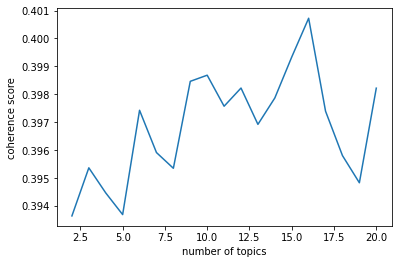

In [ ]:
#when epoch=2
x=range(2,21)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show

In [ ]:
ldamodel1 = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=16, 
                                               random_state=100, #randomstateobject or seed : for reproducability
                                               chunksize=20000, #batch size
                                               passes=2, #epoch
                                               )
ldamodel1.print_topics(num_words=8)

[(0,
  '0.027*"feel" + 0.017*"friend" + 0.016*"people" + 0.014*"want" + 0.013*"talk" + 0.010*"someone" + 0.009*"one" + 0.009*"time"'),
 (1,
  '0.021*"feel" + 0.016*"friend" + 0.013*"want" + 0.013*"talk" + 0.012*"make" + 0.011*"life" + 0.011*"someone" + 0.011*"people"'),
 (2,
  '0.023*"feel" + 0.017*"friend" + 0.016*"people" + 0.016*"want" + 0.011*"make" + 0.010*"one" + 0.009*"lonely" + 0.009*"talk"'),
 (3,
  '0.019*"feel" + 0.016*"friend" + 0.015*"people" + 0.014*"want" + 0.011*"make" + 0.009*"talk" + 0.009*"time" + 0.008*"lonely"'),
 (4,
  '0.022*"feel" + 0.017*"people" + 0.016*"friend" + 0.013*"want" + 0.010*"talk" + 0.010*"life" + 0.009*"time" + 0.008*"make"'),
 (5,
  '0.019*"friend" + 0.017*"want" + 0.017*"feel" + 0.011*"make" + 0.010*"people" + 0.009*"lonely" + 0.009*"someone" + 0.009*"talk"'),
 (6,
  '0.018*"friend" + 0.017*"want" + 0.017*"feel" + 0.012*"people" + 0.011*"make" + 0.010*"time" + 0.010*"talk" + 0.008*"lonely"'),
 (7,
  '0.022*"friend" + 0.018*"feel" + 0.016*"want" +

In [ ]:
ldamodel1.save('loneliness_webscrap_lda_1.gensim')

In [ ]:
ldamodel2 = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=9, 
                                               random_state=100, #randomstateobject or seed : for reproducability
                                               chunksize=20000, #batch size
                                               passes=1, #epoch
                                               )

ldamodel2.print_topics(num_words=8)

[(0,
  '0.026*"feel" + 0.018*"friend" + 0.016*"people" + 0.013*"want" + 0.013*"talk" + 0.010*"someone" + 0.009*"one" + 0.008*"time"'),
 (1,
  '0.020*"feel" + 0.017*"friend" + 0.013*"talk" + 0.013*"want" + 0.012*"make" + 0.011*"life" + 0.011*"someone" + 0.010*"time"'),
 (2,
  '0.022*"feel" + 0.018*"friend" + 0.015*"want" + 0.015*"people" + 0.011*"one" + 0.010*"make" + 0.009*"lonely" + 0.009*"talk"'),
 (3,
  '0.019*"feel" + 0.017*"friend" + 0.015*"people" + 0.015*"want" + 0.011*"make" + 0.010*"talk" + 0.009*"time" + 0.008*"lonely"'),
 (4,
  '0.021*"feel" + 0.017*"people" + 0.017*"friend" + 0.014*"want" + 0.011*"talk" + 0.010*"life" + 0.009*"time" + 0.008*"make"'),
 (5,
  '0.020*"friend" + 0.019*"want" + 0.017*"feel" + 0.011*"make" + 0.010*"people" + 0.009*"talk" + 0.009*"one" + 0.009*"someone"'),
 (6,
  '0.019*"friend" + 0.018*"want" + 0.017*"feel" + 0.012*"people" + 0.012*"make" + 0.011*"time" + 0.010*"talk" + 0.009*"one"'),
 (7,
  '0.024*"friend" + 0.017*"feel" + 0.016*"want" + 0.013*"

In [ ]:
ldamodel2.save('loneliness_webscrap_lda_2.gensim')

C:\Users\lovel\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:

ldamodel3 = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=10, 
                                               random_state=100, #randomstateobject or seed : for reproducability
                                               chunksize=20000, #batch size
                                               passes=1, #epoch
                                               )

ldamodel3.print_topics(num_words=8)

[(0,
  '0.026*"feel" + 0.018*"friend" + 0.016*"people" + 0.013*"want" + 0.013*"talk" + 0.010*"someone" + 0.009*"one" + 0.009*"time"'),
 (1,
  '0.020*"feel" + 0.018*"friend" + 0.013*"talk" + 0.013*"want" + 0.012*"make" + 0.011*"someone" + 0.011*"life" + 0.011*"time"'),
 (2,
  '0.022*"feel" + 0.019*"friend" + 0.015*"people" + 0.015*"want" + 0.011*"one" + 0.010*"make" + 0.009*"lonely" + 0.009*"time"'),
 (3,
  '0.019*"feel" + 0.018*"friend" + 0.016*"people" + 0.015*"want" + 0.011*"make" + 0.010*"talk" + 0.010*"time" + 0.008*"lonely"'),
 (4,
  '0.021*"feel" + 0.017*"people" + 0.017*"friend" + 0.014*"want" + 0.011*"talk" + 0.010*"life" + 0.010*"time" + 0.008*"make"'),
 (5,
  '0.021*"friend" + 0.019*"want" + 0.017*"feel" + 0.011*"make" + 0.010*"people" + 0.009*"someone" + 0.009*"lonely" + 0.009*"talk"'),
 (6,
  '0.020*"friend" + 0.018*"want" + 0.017*"feel" + 0.012*"people" + 0.011*"make" + 0.011*"time" + 0.010*"talk" + 0.009*"one"'),
 (7,
  '0.025*"friend" + 0.018*"feel" + 0.016*"want" + 0.01

In [ ]:
ldamodel3.save('loneliness_webscrap_lda_3.gensim')

In [ ]:
ldamodel4 = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=6, 
                                               random_state=100, #randomstateobject or seed : for reproducability
                                               chunksize=20000, #batch size
                                               passes=1, #epoch
                                               )
ldamodel4.print_topics(num_words=8)

C:\Users\lovel\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\lovel\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\lovel\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(

[(0,
  '0.025*"feel" + 0.019*"friend" + 0.015*"people" + 0.014*"want" + 0.013*"talk" + 0.010*"one" + 0.010*"someone" + 0.009*"time"'),
 (1,
  '0.018*"feel" + 0.018*"friend" + 0.013*"want" + 0.013*"talk" + 0.012*"make" + 0.011*"life" + 0.011*"time" + 0.011*"someone"'),
 (2,
  '0.021*"feel" + 0.019*"friend" + 0.016*"want" + 0.014*"people" + 0.012*"one" + 0.010*"make" + 0.009*"time" + 0.009*"lonely"'),
 (3,
  '0.018*"feel" + 0.018*"friend" + 0.015*"want" + 0.015*"people" + 0.011*"make" + 0.010*"time" + 0.010*"talk" + 0.009*"one"'),
 (4,
  '0.020*"feel" + 0.018*"friend" + 0.016*"people" + 0.015*"want" + 0.010*"talk" + 0.010*"life" + 0.010*"time" + 0.008*"make"'),
 (5,
  '0.021*"friend" + 0.020*"want" + 0.016*"feel" + 0.011*"make" + 0.010*"one" + 0.009*"people" + 0.009*"lonely" + 0.009*"talk"')]

In [ ]:
ldamodel4.save('loneliness_webscrap_lda_4.gensim')

C:\Users\lovel\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### C. LDA 시각화화기

In [1]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 43.1 MB/s 
     |████████████████████████████████| 15.7 MB 181 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=e0ad2c9f5c12f7cc02897e6b1ed0858b2fd32bc1aa7e3b8b1a6660d65b604cec
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take int

In [2]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.gensim.prepare(ldamodel1, corpus, dictionary)

#pyLDAvis.save_html(vis1, 'loneliness_webscrap_lda_1.html')
pyLDAvis.display(vis1)


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func


ModuleNotFoundError: ignored

In [ ]:
vis2 = pyLDAvis.gensim.prepare(ldamodel2, corpus, dictionary)
pyLDAvis.display(vis2)

In [ ]:
pyLDAvis.save_html(vis2, 'loneliness_webscrap_lda_2.html')

In [ ]:
vis3 = pyLDAvis.gensim.prepare(ldamodel3, corpus, dictionary)
pyLDAvis.display(vis3)

In [ ]:
pyLDAvis.save_html(vis3, 'loneliness_webscrap_lda_3.html')

In [ ]:
vis4 = pyLDAvis.gensim.prepare(ldamodel4, corpus, dictionary)
pyLDAvis.display(vis4)

In [ ]:
pyLDAvis.save_html(vis4, 'loneliness_webscrap_lda_4.html')

### D. 문서 별 토픽 분포

In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel1, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.6936,"[(0, 0.6936452), (1, 0.038449474), (2, 0.01492..."
1,1,7.0,0.9594,"[(0, 0.018768067), (1, 0.012715875), (7, 0.959..."
2,2,7.0,0.7514,"[(0, 0.22782506), (7, 0.75139064)]"
3,3,7.0,0.8212,"[(0, 0.119267434), (1, 0.023579666), (7, 0.821..."
4,4,7.0,0.8755,"[(0, 0.03399629), (1, 0.011409883), (2, 0.0193..."
5,5,7.0,0.8750,"[(0, 0.02197378), (1, 0.08120179), (7, 0.87496..."
6,6,7.0,0.7954,"[(0, 0.019431232), (1, 0.02845456), (2, 0.1296..."
7,7,0.0,0.6460,"[(0, 0.6460253), (1, 0.023810627), (2, 0.02432..."
8,8,7.0,0.5594,"[(0, 0.23933978), (1, 0.1713833), (2, 0.017766..."
9,9,0.0,0.6645,"[(0, 0.6645204), (1, 0.014702855), (2, 0.02003..."


In [ ]:
topictable = make_topictable_per_doc(ldamodel2, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,7.0,0.4296,"[(0, 0.17940031), (1, 0.14204621), (2, 0.14390..."
1,1,0.0,0.3415,"[(0, 0.3414949), (1, 0.1405439), (2, 0.2143204..."
2,2,7.0,0.3345,"[(0, 0.2542292), (1, 0.12040233), (2, 0.207046..."
3,3,7.0,0.4823,"[(0, 0.26599854), (1, 0.1130018), (2, 0.062633..."
4,4,7.0,0.4341,"[(0, 0.22984406), (1, 0.14480901), (2, 0.06726..."
5,5,7.0,0.5456,"[(0, 0.22948511), (1, 0.08862488), (2, 0.04627..."
6,6,7.0,0.4949,"[(0, 0.14423847), (1, 0.15369816), (2, 0.05386..."
7,7,7.0,0.3261,"[(0, 0.16474086), (1, 0.2808636), (2, 0.117503..."
8,8,0.0,0.3156,"[(0, 0.31563497), (1, 0.16633983), (2, 0.08912..."
9,9,0.0,0.2646,"[(0, 0.2645668), (1, 0.18281281), (2, 0.202428..."


In [ ]:
topictable = make_topictable_per_doc(ldamodel3, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.4258,"[(0, 0.42579892), (1, 0.13378322), (2, 0.15983..."
1,1,0.0,0.4512,"[(0, 0.45121747), (1, 0.11697397), (2, 0.06917..."
2,2,7.0,0.4390,"[(0, 0.2228818), (1, 0.08929401), (2, 0.176588..."
3,3,7.0,0.5809,"[(0, 0.22121374), (1, 0.056887165), (2, 0.0507..."
4,4,7.0,0.5550,"[(0, 0.18604726), (1, 0.082320094), (2, 0.0927..."
5,5,7.0,0.3027,"[(0, 0.10024099), (1, 0.15765871), (2, 0.28077..."
6,6,1.0,0.3572,"[(0, 0.074391805), (1, 0.35719323), (2, 0.0727..."
7,7,7.0,0.5782,"[(0, 0.18177512), (1, 0.0894762), (2, 0.075719..."
8,8,7.0,0.4095,"[(0, 0.21155737), (1, 0.1337584), (2, 0.131998..."
9,9,7.0,0.4808,"[(0, 0.20745337), (1, 0.10781539), (2, 0.09215..."


In [ ]:
topictable = make_topictable_per_doc(ldamodel4, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,2.0,0.3795,"[(0, 0.2580596), (1, 0.36239418), (2, 0.379546..."
1,1,2.0,0.4274,"[(0, 0.41275215), (1, 0.15983644), (2, 0.42741..."
2,2,2.0,0.4178,"[(0, 0.39226007), (1, 0.18994845), (2, 0.41779..."
3,3,0.0,0.4642,"[(0, 0.46417043), (1, 0.19230978), (2, 0.34351..."
4,4,2.0,0.4714,"[(0, 0.31581622), (1, 0.21280515), (2, 0.47137..."
5,5,0.0,0.4911,"[(0, 0.49111396), (1, 0.22213048), (2, 0.28675..."
6,6,2.0,0.4460,"[(0, 0.34584224), (1, 0.20818357), (2, 0.44597..."
7,7,2.0,0.5262,"[(0, 0.30169636), (1, 0.17215341), (2, 0.52615..."
8,8,2.0,0.3919,"[(0, 0.39020926), (1, 0.21786793), (2, 0.39192..."
9,9,0.0,0.4297,"[(0, 0.4296533), (1, 0.24314623), (2, 0.327200..."


In [ ]:
topictable['각 토픽의 비중'][0]

[(0, 0.42579892),
 (1, 0.13378322),
 (2, 0.15983222),
 (3, 0.0144347325),
 (4, 0.020317428),
 (5, 0.011090369),
 (6, 0.021318134),
 (7, 0.17565703),
 (8, 0.017445557),
 (9, 0.020322388)]

### The most representative sentence for each topic: Topic number, Topic percentage contribution, Keywords, Representative Text 

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel4, corpus=corpus, texts=text_combined)

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.5227,"feel, friend, people, want, talk, one, someone, time, life, make","[positive, something, amount, social, interaction, recently, unusual, feel, good, haha, proud, m..."
1,2.0,0.3101,"feel, friend, want, people, one, make, time, lonely, talk, someone","[escape, feel, move, past, hill, feel, single, almost, 6, year, fun, heart, play, broken, many, ..."


In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel2, corpus=corpus, texts=text_combined)

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.2962,"feel, friend, people, want, talk, someone, one, time, life, thing","[failed, happen, people, life, veteran, national, crisis, line, need, social, medium, need, hold..."
1,7.0,0.6463,"friend, feel, want, one, people, talk, time, life, make, someone","[escape, feel, move, past, hill, feel, single, almost, 6, year, fun, heart, play, broken, many, ..."


## CTM (Correlated Topic Modeling): Tomotopy

In [ ]:
text_cb_notflat= data

### Step1: Vocab 조정: min_cf, rm_top
documentation참고: https://bab2min.github.io/tomotopy/v0.10.0/en/index.html#tomotopy.CTModel

- no remove_top

In [ ]:
import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
model = tp.CTModel(k=22, tw=tp.TermWeight.ONE, min_df=10, seed=100) #seed=100
# LDAModel을 생성합니다.
# 토픽의 개수(k)는 20개, alpha 파라미터는 0.1, eta 파라미터는 0.01
# 전체 말뭉치에 5회 미만 등장한 단어들은 제거할 겁니다.
 
for timeperiod in text_cb_notflat:
    for i, line in enumerate(timeperiod):
    #model2.add_doc(" ".join(line))
    #model2.add_doc(line)
    #model2.add_doc(post)
        if line != []:
            model.add_doc(line)
        if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
print("starting to get ready") 

# model의 num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고 학습 준비만 시킵니다.
model.burn_in=100
model.train(0) 
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)
 
print("ready")

# 총 1000회 train(깁스샘플링)을 반복합니다. 적절한 반복회수는 데이터에 따라 다릅니다.
# 매 단계별로 로그 가능도 값을 출력해줍니다. 
# ll_per_word 값의 증가가 둔화되거나 멈추는 지점까지만 반복하는걸 추천합니다.
for i in range(0, 300, 20):
    print('Iteration: {:04}, LL per word: {:.4}'.format(i, model.ll_per_word))
    model.train(20)
print('Iteration: {:04}, LL per word: {:.4}'.format(i, model.ll_per_word)) 
#혹은 단순히 model.train(200)으로 200회 반복도 가능합니다.
#for i in range(200):
#    print('Iteration {}\tLL per word: {}'.format(i, model.ll_per_word))
#    model.train(1)


Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has bee

Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #

Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #

Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #1260 has been loaded
Document #127

In [ ]:
for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
    coh = tp.coherence.Coherence(model, coherence=preset)
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]
    print('==== Coherence : {} ===='.format(preset))
    print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
    print()
 
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model.k):
    # 토픽 개수가 총 20개이니, 0~19번까지의 토픽별 상위 단어 10개를 뽑아봅시다.
    res = model.get_topic_words(i, top_n=8)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

==== Coherence : u_mass ====
Average: -2.2483171450741244 
Per Topic: [-1.9066458081827031, -2.026997743523373, -2.3596724166150693, -2.249199023227729, -2.1536637402360013, -2.2161926083394716, -1.9731198554590914, -2.3080682087131272, -2.494973808273121, -2.3089328016930426, -2.2970689050545294, -2.207771384977768, -2.0937892691851583, -2.309750829781066, -2.0838548381178503, -2.2822075925027145, -2.4647444880417173, -2.1153248596404115, -2.024041249705975, -2.389276397682503, -2.7558497714518246, -2.4418315912264927]

==== Coherence : c_uci ====
Average: -0.11762078245203224 
Per Topic: [0.16132799723170607, -0.016327150405355595, -0.14751817600730602, -0.38553233294131417, -0.12752964357130253, 0.08089883309284446, -0.17803762482831936, -0.11207734824409853, -0.268504037866745, -0.13006867031956448, -0.15168318359468871, -0.21369587037428958, -0.03244361483195143, -0.008265327655006264, -0.024819490459703695, 0.035086871664963555, -0.5298178142724504, -0.13209644540613844, -0.12985

- min_cf 없음, rm_top=10  
vocab size: 4114  
topic간 변별력: ok

In [ ]:
import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
model = tp.CTModel(k=23, tw=tp.TermWeight.ONE, min_df=10, rm_top=10, seed=100) #seed=100
# LDAModel을 생성합니다.
# 토픽의 개수(k)는 20개, alpha 파라미터는 0.1, eta 파라미터는 0.01
# 전체 말뭉치에 5회 미만 등장한 단어들은 제거할 겁니다.
 
for timeperiod in text_cb_notflat:
    for i, line in enumerate(timeperiod):
    #model2.add_doc(" ".join(line))
    #model2.add_doc(line)
    #model2.add_doc(post)
        if line != []:
            model.add_doc(line)
        if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
print("starting to get ready") 

# model의 num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고 학습 준비만 시킵니다.
model.burn_in=100
model.train(0) 
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)
 
print("ready")

# 총 1000회 train(깁스샘플링)을 반복합니다. 적절한 반복회수는 데이터에 따라 다릅니다.
# 매 단계별로 로그 가능도 값을 출력해줍니다. 
# ll_per_word 값의 증가가 둔화되거나 멈추는 지점까지만 반복하는걸 추천합니다.
for i in range(0, 300, 20):
    print('Iteration: {:04}, LL per word: {:.4}'.format(i, model.ll_per_word))
    model.train(20)
print('Iteration: {:04}, LL per word: {:.4}'.format(i, model.ll_per_word)) 
#혹은 단순히 model.train(200)으로 200회 반복도 가능합니다.
#for i in range(200):
#    print('Iteration {}\tLL per word: {}'.format(i, model.ll_per_word))
#    model.train(1)


Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has bee

Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #

Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Do

Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has 

In [ ]:
for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
    coh = tp.coherence.Coherence(model, coherence=preset)
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]
    print('==== Coherence : {} ===='.format(preset))
    print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
    print()
 
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model.k):
    # 토픽 개수가 총 20개이니, 0~19번까지의 토픽별 상위 단어 10개를 뽑아봅시다.
    res = model.get_topic_words(i, top_n=8)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

==== Coherence : u_mass ====
Average: -2.3096693732922744 
Per Topic: [-2.4570904045832265, -1.9842387136770765, -2.478005396156565, -2.321595722502586, -2.3944664795857684, -2.5340514445158933, -1.9951524953291482, -2.385686615280594, -2.0335862519153713, -2.8180809446244717, -2.1548594172252304, -1.9216806757712694, -2.3638896139001497, -2.213364065524388, -2.4029063740130656, -2.4337522291770175, -2.2309052504998212, -2.203587328751468, -2.280027884024648, -2.1032196697534253, -2.247441986928725, -2.587900173530719, -2.576906448451674]

==== Coherence : c_uci ====
Average: -0.2512531886613223 
Per Topic: [-0.5939430828187605, -0.0845626811155771, -0.30178524515085603, -0.20308074911672508, -0.06757572152124061, -0.22652211689113982, -0.09892802416339791, -0.1049396205922745, -0.5781725054393829, -0.9566406423299683, -0.2027304240132581, -0.16419122879553943, -0.3052275413670501, -0.15876037472025445, -0.038107583397719774, -0.37273278593346976, -0.17364535145708968, -0.0741870334453

- min_cf 없음, rm_top=5  
vocab size: 4119  
topic간 변별력: ok

In [ ]:
import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
model2 = tp.CTModel(k=23, tw=tp.TermWeight.ONE, min_df=10, rm_top=5, seed=100) #seed=100
 
for timeperiod in text_cb_notflat:
    for i, line in enumerate(timeperiod):
        if line != []:
            model2.add_doc(line)
        if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
print("starting to get ready") 

# num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고 학습 준비만 시킵니다.
model2.burn_in=100
model2.train(0) 
print('Total docs:', len(model2.docs))
print('Total words:', model2.num_words)
print('Vocab size:', model2.num_vocabs)
 
print("ready")

# 총 1000회 train(깁스샘플링)을 반복합니다. 적절한 반복회수는 데이터에 따라 다릅니다.
# 매 단계별로 로그 가능도 값을 출력해줍니다. 
# ll_per_word 값의 증가가 둔화되거나 멈추는 지점까지만 반복하는걸 추천합니다.
for i in range(0, 300, 20):
    print('Iteration: {:04}, LL per word: {:.4}'.format(i, model2.ll_per_word))
    model2.train(20)
print('Iteration: {:04}, LL per word: {:.4}'.format(i, model2.ll_per_word)) 
#혹은 단순히 model2.train(200)으로 200회 반복도 가능합니다.
#for i in range(200):
#    print('Iteration {}\tLL per word: {}'.format(i, model2.ll_per_word))
#    model2.train(1)


Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has bee

Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #

Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #

In [ ]:
for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
    coh = tp.coherence.Coherence(model2, coherence=preset)
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model2.k)]
    print('==== Coherence : {} ===='.format(preset))
    print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
    print()
 
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model2.k):
    # 토픽 개수가 총 20개이니, 0~19번까지의 토픽별 상위 단어 10개를 뽑아봅시다.
    res = model2.get_topic_words(i, top_n=8)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

==== Coherence : u_mass ====
Average: -2.2358462927188594 
Per Topic: [-2.17399585259035, -2.6466815375446675, -2.5211970436815934, -1.8817196204553246, -2.585624626219081, -2.1575070234184643, -2.094625779555548, -2.3683619466805745, -2.1619571148466474, -2.389048833711352, -2.069548321836435, -1.8932658885636817, -2.1014684686517193, -2.1789279377077797, -2.1254878913602364, -1.8971861263922785, -2.3055361144998368, -2.3548086286604586, -2.5741167191653216, -2.335657925913417, -2.2873978346952604, -2.256149231932818, -2.06419426445091]

==== Coherence : c_uci ====
Average: -0.1646701602398191 
Per Topic: [-0.05574993800062473, -0.46759464647049426, -0.14700993292759565, -0.18873411638333057, -0.22376301081415156, -0.01735009660604868, -0.06812275477838295, -0.053057332931193704, -0.11979640868876346, -0.0806469816221926, -0.13869465828823155, 0.2016758313618949, -0.1184908410157315, -0.1268332028925797, -0.05564379732316918, -0.07038212381003503, -0.06420937795792786, -0.366246097860

### Step2: Hyperparameter tuning
documentation참고: https://bab2min.github.io/tomotopy/v0.10.0/en/index.html#tomotopy.DTModel

- top_rm=5, min_df=10, min_cf=없음
  - termweight.ONE

In [ ]:
coherence= []

import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
for kk in range(5,30):
    modelt = tp.CTModel(k=kk, tw=tp.TermWeight.ONE, min_df=10, rm_top=5, seed=100) #seed=100
 
    for timeperiod in text_cb_notflat:
        for i, line in enumerate(timeperiod):
            if line != []:
                modelt.add_doc(line)
            if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
    print("starting to get ready") 

    modelt.burn_in=100
    modelt.train(0) 
    print('Total docs:', len(modelt.docs))
    print('Total words:', modelt.num_words)
    print('Vocab size:', modelt.num_vocabs)
 
    print("ready")

    for i in range(0, 300, 20):
        print('Iteration: {:04}, LL per word: {:.4}'.format(i, modelt.ll_per_word))
    modelt.train(20)
    
    for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
        cl=[kk]
        coh = tp.coherence.Coherence(modelt, coherence=preset)
        average_coherence = coh.get_score()
        cl.append(average_coherence)
        #coherence_per_topic = [coh.get_score(topic_id=k) for k in range(modelt.k)]
        print('==== Coherence : {} ===='.format(preset))
        print('Average:', average_coherence)
        print()
    coherence.append(cl)
    


Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has bee

Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Docu

Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #41

Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Documen

Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #

Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document

Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -7.516
Iteration: 0020, LL per word: -7.516
Iteration: 0040, LL per word: -7.516
Iteration: 0060, LL per word: -7.516
Iteration: 0080, LL per word: -7.516
Iteration: 0100, LL per word: -7.516
Iteration: 0120, LL per word: -7.516
Iteration: 0140, LL per word: -7.516
Iteration: 0160, LL per word: -7.516
Iteration: 0180, LL per word: -7.516
Iteration: 0200, LL per word: -7.516
Iteration: 0220, LL per word: -7.516
Iteration: 0240, LL per word: -7.516
Iteration: 0260, LL per word: -7.516
Iteration: 0280, LL per word: -7.516
==== Coherence : u_mass ====
Average: -1.1578713664036917

==== Coherence : c_uci ====
Average: -0.10306530541750826

==== Coherence : c_npmi ====
Average: -0.015889799500172806

==== Coherence : c_v ====
Average: 0.3928438459833463

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docume

Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Documen

Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #

Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #

Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #

Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #

Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -7.665
Iteration: 0020, LL per word: -7.665
Iteration: 0040, LL per word: -7.665
Iteration: 0060, LL per word: -7.665
Iteration: 0080, LL per word: -7.665
Iteration: 0100, LL per word: -7.665
Iteration: 0120, LL per word: -7.665
Iteration: 0140, LL per word: -7.665
Iteration: 0160, LL per word: -7.665
Iteration: 0180, LL per word: -7.665
Iteration: 0200, LL per word: -7.665
Iteration: 0220, LL per word: -7.665
Iteration: 0240, LL per word: -7.665
Iteration: 0260, LL per word: -7.665
Iteration: 0280, LL per word: -7.665
==== Coherence : u_mass ====
Average: -1.2150409783923901

==== Coherence : c_uci ====
Average: -0.10837579878694133

==== Coherence : c_npmi ====
Average: -0.016168794334779656

==== Coherence : c_v ====
Average: 0.40818506609648464

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docum

Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #

Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has been loaded
Document #1200 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document 

Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document 

Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #

Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #1260 has been loaded
Document #1270 has been loaded
Document #1280 has been loaded
Document #1290 has been loaded
Document #1300 has been loaded
Document #1310 has been loaded
Document #1320 has been loaded
Document #1330 has been loaded
Document #1340 has been loaded
Document #1350 has been loaded
Document #1360 has been loaded
Document #1370 has been loaded
Document #1380 has been loaded
Document #1390 has been loaded
Document #1400 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded

Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #4

Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #

Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been lo

Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -7.87
Iteration: 0020, LL per word: -7.87
Iteration: 0040, LL per word: -7.87
Iteration: 0060, LL per word: -7.87
Iteration: 0080, LL per word: -7.87
Iteration: 0100, LL per word: -7.87
Iteration: 0120, LL per word: -7.87
Iteration: 0140, LL per word: -7.87
Iteration: 0160, LL per word: -7.87
Iteration: 0180, LL per word: -7.87
Iteration: 0200, LL per word: -7.87
Iteration: 0220, LL per word: -7.87
Iteration: 0240, LL per word: -7.87
Iteration: 0260, LL per word: -7.87
Iteration: 0280, LL per word: -7.87
==== Coherence : u_mass ====
Average: -1.2399574969003324

==== Coherence : c_uci ====
Average: -0.1037815261233011

==== Coherence : c_npmi ====
Average: -0.014923098512654227

==== Coherence : c_v ====
Average: 0.4050562220540914

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been 

Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #

Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been load

Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #

Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #

Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #

Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loade

Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #1260 has been loaded
Document #1270 has been loaded
Document #1280 has been loaded
Document #1290 has been loaded
Document #1300 has been loaded
Document #1310 has been loaded
Document #1320 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Doc

Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #1260 has been loaded
Document #1270 has been loaded
Document #1280 has been loaded
Document #1290 has been loaded
Document #1300 has been loaded
Document #1310 has been loaded
Document #1320 has been loaded
Document #1330 has been loaded
Document #1340 has been loaded
Document #1350 has been loaded
Document #1360 has been loaded
Document #1370 has been loaded
Document #1380 has been loaded
Document #1390 has been loaded
Document #1400 has been loaded
Document #1410 has been loaded
Document #1420 has been loaded
Document #1430 has been loaded
Document #1440 has been loaded
starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -8.059
Iteration: 0020, LL per word: -8.059
Iteration: 0040, LL per word: -8.059
Iteration: 0060, LL per word: -8.059
Iteration: 0080, LL per word: -8.059
Iteration: 0100, LL per word: -8.059
Iteration: 01

Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been load

Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 ha

Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -8.118
Iteration: 0020, LL per word: -8.118
Iteration: 0040, LL per word: -8.118
Iteration: 0060, LL per word: -8.118
Iteration: 0080, LL per word: -8.118
Iteration: 0100, LL per word: -8.118
Iteration: 0120, LL per word: -8.118
Iteration: 0140, LL per word: -8.118
Iteration: 0160, LL per word: -8.118
Iteration: 0180, LL per word: -8.118
Iteration: 0200, LL per word: -8.118
Iteration: 0220, LL per word: -8.118
Iteration: 0240, LL per word: -8.118
Iteration: 0260, LL per word: -8.118
Iteration: 0280, LL per word: -8.118
==== Coherence : u_mass ====
Average: -1.3877718423739611

==== Coherence : c_uci ====
Average: -0.11416258336747644

==== Coherence : c_npmi ====
Average: -0.015763377412937162

==== Coherence : c_v ====
Average: 0.4118966324130694

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docume

Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been lo

Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #

Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -8.175
Iteration: 0020, LL per word: -8.175
Iteration: 0040, LL per word: -8.175
Iteration: 0060, LL per word: -8.175
Iteration: 0080, LL per word: -8.175
Iteration: 0100, LL per word: -8.175
Iteration: 0120, LL per word: -8.175
Iteration: 0140, LL per word: -8.175
Iteration: 0160, LL per word: -8.175
Iteration: 0180, LL per word: -8.175
Iteration: 0200, LL per word: -8.175
Iteration: 0220, LL per word: -8.175
Iteration: 0240, LL per word: -8.175
Iteration: 0260, LL per word: -8.175
Iteration: 0280, LL per word: -8.175
==== Coherence : u_mass ====
Average: -1.375543192664288

==== Coherence : c_uci ====
Average: -0.1235436925121767

==== Coherence : c_npmi ====
Average: -0.01691220825233983

==== Coherence : c_v ====
Average: 0.40546521304640926

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document

Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded


Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded


Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Docu

Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #1260 has been loaded
Document #1270 has been loaded
Document #1280 has been loaded
Document #1290 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #2

Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #

Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #

Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -8.291
Iteration: 0020, LL per word: -8.291
Iteration: 0040, LL per word: -8.291
Iteration: 0060, LL per word: -8.291
Iteration: 0080, LL per word: -8.291
Iteration: 0100, LL per word: -8.291
Iteration: 0120, LL per word: -8.291
Iteration: 0140, LL per word: -8.291
Iteration: 0160, LL per word: -8.291
Iteration: 0180, LL per word: -8.291
Iteration: 0200, LL per word: -8.291
Iteration: 0220, LL per word: -8.291
Iteration: 0240, LL per word: -8.291
Iteration: 0260, LL per word: -8.291
Iteration: 0280, LL per word: -8.291
==== Coherence : u_mass ====
Average: -1.452811753055405

==== Coherence : c_uci ====
Average: -0.11819256032167688

==== Coherence : c_npmi ====
Average: -0.015941326971698592

==== Coherence : c_v ====
Average: 0.41454883242646856

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docume

Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has be

Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #

Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #

Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has been loaded
Document #1200 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been 

Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Documen

Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #

Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded


Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been

Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 ha

Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -8.505
Iteration: 0020, LL per word: -8.505
Iteration: 0040, LL per word: -8.505
Iteration: 0060, LL per word: -8.505
Iteration: 0080, LL per word: -8.505
Iteration: 0100, LL per word: -8.505
Iteration: 0120, LL per word: -8.505
Iteration: 0140, LL per word: -8.505
Iteration: 0160, LL per word: -8.505
Iteration: 0180, LL per word: -8.505
Iteration: 0200, LL per word: -8.505
Iteration: 0220, LL per word: -8.505
Iteration: 0240, LL per word: -8.505
Iteration: 0260, LL per word: -8.505
Iteration: 0280, LL per word: -8.505
==== Coherence : u_mass ====
Average: -1.503803686557049

==== Coherence : c_uci ====
Average: -0.1342334586290472

==== Coherence : c_npmi ====
Average: -0.018094640721631215

==== Coherence : c_v ====
Average: 0.413564461435784

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document 

Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #

Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #

Document #1160 has been loaded
Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #1260 has been loaded
Document #1270 has been loaded
Document #1280 has been loaded
Document #1290 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Documen

Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #

Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #

Document #1280 has been loaded
Document #1290 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has b

Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #

Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Docum

Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -8.659
Iteration: 0020, LL per word: -8.659
Iteration: 0040, LL per word: -8.659
Iteration: 0060, LL per word: -8.659
Iteration: 0080, LL per word: -8.659
Iteration: 0100, LL per word: -8.659
Iteration: 0120, LL per word: -8.659
Iteration: 0140, LL per word: -8.659
Iteration: 0160, LL per word: -8.659
Iteration: 0180, LL per word: -8.659
Iteration: 0200, LL per word: -8.659
Iteration: 0220, LL per word: -8.659
Iteration: 0240, LL per word: -8.659
Iteration: 0260, LL per word: -8.659
Iteration: 0280, LL per word: -8.659
==== Coherence : u_mass ====
Average: -1.535146703603785

==== Coherence : c_uci ====
Average: -0.1235644762373906

==== Coherence : c_npmi ====
Average: -0.016148563462139092

==== Coherence : c_v ====
Average: 0.4089431078732013

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document

Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded


Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loade

Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #

Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #

Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #

Document #1250 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has be

Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #

Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has b

Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #

In [ ]:
coherence 

[[5, 0.3979315942525864],
 [6, 0.3928438459833463],
 [7, 0.4022843512041228],
 [8, 0.40818506609648464],
 [9, 0.40538440578513674],
 [10, 0.4067896568775177],
 [11, 0.4050562220540914],
 [12, 0.4063781201839447],
 [13, 0.41343668871201],
 [14, 0.4118546888232231],
 [15, 0.4118966324130694],
 [16, 0.40546521304640926],
 [17, 0.407307923190734],
 [18, 0.41454883242646856],
 [19, 0.4104518262179275],
 [20, 0.41396816980093715],
 [21, 0.4110406157383251],
 [22, 0.413564461435784],
 [23, 0.406407082713533],
 [24, 0.4059869908650094],
 [25, 0.4089431078732013],
 [26, 0.4189048814372374],
 [27, 0.4095063405525352],
 [28, 0.40970581031537473],
 [29, 0.41177477412054253]]

  - termweight.IDF: Coherence  더 낮아짐

In [ ]:
coherence_2= []

import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
for kk in range(5,30):
    modelt = tp.CTModel(k=kk, tw=tp.TermWeight.IDF, min_df=10, rm_top=5, seed=100) #seed=100
 
    for timeperiod in text_cb_notflat:
        for i, line in enumerate(timeperiod):
            if line != []:
                modelt.add_doc(line)
            #if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
    print("starting to get ready") 

    modelt.burn_in=100
    modelt.train(0) 
    print('Total docs:', len(modelt.docs))
    print('Total words:', modelt.num_words)
    print('Vocab size:', modelt.num_vocabs)
 
    print("ready")

    for i in range(0, 300, 20):
        print('Iteration: {:04}, LL per word: {:.4}'.format(i, modelt.ll_per_word))
    modelt.train(20)
    
    for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
        cl=[kk]
        coh = tp.coherence.Coherence(modelt, coherence=preset)
        average_coherence = coh.get_score()
        cl.append(average_coherence)
        #coherence_per_topic = [coh.get_score(topic_id=k) for k in range(modelt.k)]
        print('==== Coherence : {} ===='.format(preset))
        print('Average:', average_coherence)
        print()
    coherence_2.append(cl)

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -25.52
Iteration: 0020, LL per word: -25.52
Iteration: 0040, LL per word: -25.52
Iteration: 0060, LL per word: -25.52
Iteration: 0080, LL per word: -25.52
Iteration: 0100, LL per word: -25.52
Iteration: 0120, LL per word: -25.52
Iteration: 0140, LL per word: -25.52
Iteration: 0160, LL per word: -25.52
Iteration: 0180, LL per word: -25.52
Iteration: 0200, LL per word: -25.52
Iteration: 0220, LL per word: -25.52
Iteration: 0240, LL per word: -25.52
Iteration: 0260, LL per word: -25.52
Iteration: 0280, LL per word: -25.52
==== Coherence : u_mass ====
Average: -1.390773741353391

==== Coherence : c_uci ====
Average: -0.11404242770537672

==== Coherence : c_npmi ====
Average: -0.016376348470402098

==== Coherence : c_v ====
Average: 0.41513784527778624

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -25.63
Iteratio

Iteration: 0200, LL per word: -26.36
Iteration: 0220, LL per word: -26.36
Iteration: 0240, LL per word: -26.36
Iteration: 0260, LL per word: -26.36
Iteration: 0280, LL per word: -26.36
==== Coherence : u_mass ====
Average: -1.9409887410832216

==== Coherence : c_uci ====
Average: -0.38357602817315967

==== Coherence : c_npmi ====
Average: -0.026442866820384315

==== Coherence : c_v ====
Average: 0.37643570492842365

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -26.45
Iteration: 0020, LL per word: -26.45
Iteration: 0040, LL per word: -26.45
Iteration: 0060, LL per word: -26.45
Iteration: 0080, LL per word: -26.45
Iteration: 0100, LL per word: -26.45
Iteration: 0120, LL per word: -26.45
Iteration: 0140, LL per word: -26.45
Iteration: 0160, LL per word: -26.45
Iteration: 0180, LL per word: -26.45
Iteration: 0200, LL per word: -26.45
Iteration: 0220, LL per word: -26.45
Iteration: 0240, LL per word: -26.45
Iteration: 0260,

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -27.1
Iteration: 0020, LL per word: -27.1
Iteration: 0040, LL per word: -27.1
Iteration: 0060, LL per word: -27.1
Iteration: 0080, LL per word: -27.1
Iteration: 0100, LL per word: -27.1
Iteration: 0120, LL per word: -27.1
Iteration: 0140, LL per word: -27.1
Iteration: 0160, LL per word: -27.1
Iteration: 0180, LL per word: -27.1
Iteration: 0200, LL per word: -27.1
Iteration: 0220, LL per word: -27.1
Iteration: 0240, LL per word: -27.1
Iteration: 0260, LL per word: -27.1
Iteration: 0280, LL per word: -27.1
==== Coherence : u_mass ====
Average: -2.3882849201315484

==== Coherence : c_uci ====
Average: -1.3612930960376113

==== Coherence : c_npmi ====
Average: -0.06314708851389929

==== Coherence : c_v ====
Average: 0.3463082296618571

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -27.17
Iteration: 0020, LL per w

In [ ]:
coherence_2

[[5, 0.41513784527778624],
 [6, 0.39084861005345983],
 [7, 0.40936519365225527],
 [8, 0.3852417804300785],
 [9, 0.3870458612839381],
 [10, 0.3817020565643906],
 [11, 0.36949883841655473],
 [12, 0.3665422453855475],
 [13, 0.3628848459858161],
 [14, 0.37643570492842365],
 [15, 0.37872707045326626],
 [16, 0.3498265107627958],
 [17, 0.35831088098313874],
 [18, 0.3602319883234385],
 [19, 0.35180068274861886],
 [20, 0.3579497812082991],
 [21, 0.34824678229023914],
 [22, 0.34744145196269854],
 [23, 0.35123185645788907],
 [24, 0.3463082296618571],
 [25, 0.3447763261236251],
 [26, 0.3383076080622582],
 [27, 0.34734664118883224],
 [28, 0.35175798240857803],
 [29, 0.3532896055422467]]

- Eta 조절

In [ ]:
coherence_3= []

import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
for kk in range(5,30):
    modelt = tp.CTModel(k=kk, tw=tp.TermWeight.ONE, eta=0.02, min_df=10, rm_top=5, seed=100) #seed=100
 
    for timeperiod in text_cb_notflat:
        for i, line in enumerate(timeperiod):
            if line != []:
                modelt.add_doc(line)
            #if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
    print("starting to get ready") 

    modelt.burn_in=100
    modelt.train(0) 
    print('Total docs:', len(modelt.docs))
    print('Total words:', modelt.num_words)
    print('Vocab size:', modelt.num_vocabs)
 
    print("ready")

    for i in range(0, 300, 20):
        print('Iteration: {:04}, LL per word: {:.4}'.format(i, modelt.ll_per_word))
    modelt.train(20)
    
    for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
        cl=[kk]
        coh = tp.coherence.Coherence(modelt, coherence=preset)
        average_coherence = coh.get_score()
        cl.append(average_coherence)
        #coherence_per_topic = [coh.get_score(topic_id=k) for k in range(modelt.k)]
        print('==== Coherence : {} ===='.format(preset))
        print('Average:', average_coherence)
        print()
    coherence_3.append(cl)

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -7.414
Iteration: 0020, LL per word: -7.414
Iteration: 0040, LL per word: -7.414
Iteration: 0060, LL per word: -7.414
Iteration: 0080, LL per word: -7.414
Iteration: 0100, LL per word: -7.414
Iteration: 0120, LL per word: -7.414
Iteration: 0140, LL per word: -7.414
Iteration: 0160, LL per word: -7.414
Iteration: 0180, LL per word: -7.414
Iteration: 0200, LL per word: -7.414
Iteration: 0220, LL per word: -7.414
Iteration: 0240, LL per word: -7.414
Iteration: 0260, LL per word: -7.414
Iteration: 0280, LL per word: -7.414
==== Coherence : u_mass ====
Average: -1.1600776458300588

==== Coherence : c_uci ====
Average: -0.10716000108912704

==== Coherence : c_npmi ====
Average: -0.016451648716112013

==== Coherence : c_v ====
Average: 0.3979315918684006

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -7.49
Iteration

Iteration: 0220, LL per word: -8.006
Iteration: 0240, LL per word: -8.006
Iteration: 0260, LL per word: -8.006
Iteration: 0280, LL per word: -8.006
==== Coherence : u_mass ====
Average: -1.273452882494164

==== Coherence : c_uci ====
Average: -0.11866689306991385

==== Coherence : c_npmi ====
Average: -0.01700752746810002

==== Coherence : c_v ====
Average: 0.4095464247145823

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -8.063
Iteration: 0020, LL per word: -8.063
Iteration: 0040, LL per word: -8.063
Iteration: 0060, LL per word: -8.063
Iteration: 0080, LL per word: -8.063
Iteration: 0100, LL per word: -8.063
Iteration: 0120, LL per word: -8.063
Iteration: 0140, LL per word: -8.063
Iteration: 0160, LL per word: -8.063
Iteration: 0180, LL per word: -8.063
Iteration: 0200, LL per word: -8.063
Iteration: 0220, LL per word: -8.063
Iteration: 0240, LL per word: -8.063
Iteration: 0260, LL per word: -8.063
Iteration: 0280, LL

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -8.532
Iteration: 0020, LL per word: -8.532
Iteration: 0040, LL per word: -8.532
Iteration: 0060, LL per word: -8.532
Iteration: 0080, LL per word: -8.532
Iteration: 0100, LL per word: -8.532
Iteration: 0120, LL per word: -8.532
Iteration: 0140, LL per word: -8.532
Iteration: 0160, LL per word: -8.532
Iteration: 0180, LL per word: -8.532
Iteration: 0200, LL per word: -8.532
Iteration: 0220, LL per word: -8.532
Iteration: 0240, LL per word: -8.532
Iteration: 0260, LL per word: -8.532
Iteration: 0280, LL per word: -8.532
==== Coherence : u_mass ====
Average: -1.5278444270962899

==== Coherence : c_uci ====
Average: -0.13806603773990891

==== Coherence : c_npmi ====
Average: -0.01773654348155374

==== Coherence : c_v ====
Average: 0.40550402868320806

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -8.58
Iteration

In [ ]:
coherence_3

[[5, 0.3979315918684006],
 [6, 0.39284384846687326],
 [7, 0.40558194241353446],
 [8, 0.40741286482661965],
 [9, 0.403993662363953],
 [10, 0.4007140278816223],
 [11, 0.40496461797844285],
 [12, 0.40855468846857557],
 [13, 0.41232508220351655],
 [14, 0.4095464247145823],
 [15, 0.4150803941488267],
 [16, 0.40268624506425116],
 [17, 0.4070711429504787],
 [18, 0.418724585748795],
 [19, 0.4133921417358674],
 [20, 0.4153187005594372],
 [21, 0.4091863531929752],
 [22, 0.41466975984036586],
 [23, 0.40782814860019995],
 [24, 0.40550402868320806],
 [25, 0.41174593877047294],
 [26, 0.4170378987247554],
 [27, 0.4086903114596175],
 [28, 0.40644521836989694],
 [29, 0.41070107793563904]]

In [ ]:
coherence_4= []

import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
for kk in range(5,30):
    modelt = tp.CTModel(k=kk, tw=tp.TermWeight.ONE, eta=0.03, min_df=10, rm_top=5, seed=100) #seed=100
 
    for timeperiod in text_cb_notflat:
        for i, line in enumerate(timeperiod):
            if line != []:
                modelt.add_doc(line)
            #if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
    print("starting to get ready") 

    modelt.burn_in=100
    modelt.train(0) 
    print('Total docs:', len(modelt.docs))
    print('Total words:', modelt.num_words)
    print('Vocab size:', modelt.num_vocabs)
 
    print("ready")

    for i in range(0, 300, 20):
        print('Iteration: {:04}, LL per word: {:.4}'.format(i, modelt.ll_per_word))
    modelt.train(20)
    
    for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
        cl=[kk]
        coh = tp.coherence.Coherence(modelt, coherence=preset)
        average_coherence = coh.get_score()
        cl.append(average_coherence)
        #coherence_per_topic = [coh.get_score(topic_id=k) for k in range(modelt.k)]
        print('==== Coherence : {} ===='.format(preset))
        print('Average:', average_coherence)
        print()
    coherence_4.append(cl)

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -7.402
Iteration: 0020, LL per word: -7.402
Iteration: 0040, LL per word: -7.402
Iteration: 0060, LL per word: -7.402
Iteration: 0080, LL per word: -7.402
Iteration: 0100, LL per word: -7.402
Iteration: 0120, LL per word: -7.402
Iteration: 0140, LL per word: -7.402
Iteration: 0160, LL per word: -7.402
Iteration: 0180, LL per word: -7.402
Iteration: 0200, LL per word: -7.402
Iteration: 0220, LL per word: -7.402
Iteration: 0240, LL per word: -7.402
Iteration: 0260, LL per word: -7.402
Iteration: 0280, LL per word: -7.402
==== Coherence : u_mass ====
Average: -1.1575813812557811

==== Coherence : c_uci ====
Average: -0.10716000108912704

==== Coherence : c_npmi ====
Average: -0.016451648716112013

==== Coherence : c_v ====
Average: 0.39793159782886506

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -7.475
Iterati

Iteration: 0180, LL per word: -7.977
Iteration: 0200, LL per word: -7.977
Iteration: 0220, LL per word: -7.977
Iteration: 0240, LL per word: -7.977
Iteration: 0260, LL per word: -7.977
Iteration: 0280, LL per word: -7.977
==== Coherence : u_mass ====
Average: -1.315919413097122

==== Coherence : c_uci ====
Average: -0.10898665090561366

==== Coherence : c_npmi ====
Average: -0.015098442061072451

==== Coherence : c_v ====
Average: 0.4103374068226134

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -8.032
Iteration: 0020, LL per word: -8.032
Iteration: 0040, LL per word: -8.032
Iteration: 0060, LL per word: -8.032
Iteration: 0080, LL per word: -8.032
Iteration: 0100, LL per word: -8.032
Iteration: 0120, LL per word: -8.032
Iteration: 0140, LL per word: -8.032
Iteration: 0160, LL per word: -8.032
Iteration: 0180, LL per word: -8.032
Iteration: 0200, LL per word: -8.032
Iteration: 0220, LL per word: -8.032
Iteration: 0240, L

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -8.49
Iteration: 0020, LL per word: -8.49
Iteration: 0040, LL per word: -8.49
Iteration: 0060, LL per word: -8.49
Iteration: 0080, LL per word: -8.49
Iteration: 0100, LL per word: -8.49
Iteration: 0120, LL per word: -8.49
Iteration: 0140, LL per word: -8.49
Iteration: 0160, LL per word: -8.49
Iteration: 0180, LL per word: -8.49
Iteration: 0200, LL per word: -8.49
Iteration: 0220, LL per word: -8.49
Iteration: 0240, LL per word: -8.49
Iteration: 0260, LL per word: -8.49
Iteration: 0280, LL per word: -8.49
==== Coherence : u_mass ====
Average: -1.5236128046796296

==== Coherence : c_uci ====
Average: -0.13683203705802494

==== Coherence : c_npmi ====
Average: -0.017449983328358135

==== Coherence : c_v ====
Average: 0.40674688436168566

starting to get ready
Total docs: 12784
Total words: 591608
Vocab size: 4119
ready
Iteration: 0000, LL per word: -8.537
Iteration: 0020, LL pe

In [ ]:
coherence_4

[[5, 0.39793159782886506],
 [6, 0.3928438439965248],
 [7, 0.39993134545428405],
 [8, 0.40541979093104596],
 [9, 0.40992379138867063],
 [10, 0.40572486579418177],
 [11, 0.40582409731366414],
 [12, 0.4085065968334675],
 [13, 0.4137748699348708],
 [14, 0.4103374068226134],
 [15, 0.4100608106205861],
 [16, 0.406892325100489],
 [17, 0.40710238551392264],
 [18, 0.4140686988002724],
 [19, 0.4153045271572314],
 [20, 0.41587602838873866],
 [21, 0.41554558704651534],
 [22, 0.4205374644222586],
 [23, 0.40565838183013153],
 [24, 0.40674688436168566],
 [25, 0.40897141399979586],
 [26, 0.41513177561931897],
 [27, 0.4113595145099142],
 [28, 0.41113481644008826],
 [29, 0.4102933375229096]]

- top_rm=0, min_df=10, min_cf=없음
  - termweight.ONE

In [ ]:
coherence= []

import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
for kk in range(5,30):
    modelt = tp.CTModel(k=kk, tw=tp.TermWeight.ONE, min_df=10, rm_top=0, seed=100) #seed=100
 
    for timeperiod in text_cb_notflat:
        for i, line in enumerate(timeperiod):
            if line != []:
                modelt.add_doc(line)
            if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
    print("starting to get ready") 

    modelt.burn_in=100
    modelt.train(0) 
    print('Total docs:', len(modelt.docs))
    print('Total words:', modelt.num_words)
    print('Vocab size:', modelt.num_vocabs)
 
    print("ready")

    for i in range(0, 300, 20):
        print('Iteration: {:04}, LL per word: {:.4}'.format(i, modelt.ll_per_word))
    modelt.train(20)
    
    for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
        cl=[kk]
        coh = tp.coherence.Coherence(modelt, coherence=preset)
        average_coherence = coh.get_score()
        cl.append(average_coherence)
        #coherence_per_topic = [coh.get_score(topic_id=k) for k in range(modelt.k)]
        print('==== Coherence : {} ===='.format(preset))
        print('Average:', average_coherence)
        print()
    coherence.append(cl)
    


Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has bee

Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been lo

Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #

Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document 

Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #

Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #1260 has been loaded
Document #1270 has been loaded
Document #1280 has been loaded
Document #1290 has been loaded
Document #1300 has been loaded
Document #1310 has been loaded
Document #1320 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #2

Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -7.311
Iteration: 0020, LL per word: -7.311
Iteration: 0040, LL per word: -7.311
Iteration: 0060, LL per word: -7.311
Iteration: 0080, LL per word: -7.311
Iteration: 0100, LL per word: -7.311
Iteration: 0120, LL per word: -7.311
Iteration: 0140, LL per word: -7.311
Iteration: 0160, LL per word: -7.311
Iteration: 0180, LL per word: -7.311
Iteration: 0200, LL per word: -7.311
Iteration: 0220, LL per word: -7.311
Iteration: 0240, LL per word: -7.311
Iteration: 0260, LL per word: -7.311
Iteration: 0280, LL per word: -7.311
==== Coherence : u_mass ====
Average: -0.9314785241551716

==== Coherence : c_uci ====
Average: -0.009326077990973848

==== Coherence : c_npmi ====
Average: 0.003636966218445017

==== Coherence : c_v ====
Average: 0.4569224188725154

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docume

Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #

Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #

Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -7.382
Iteration: 0020, LL per word: -7.382
Iteration: 0040, LL per word: -7.382
Iteration: 0060, LL per word: -7.382
Iteration: 0080, LL per word: -7.382
Iteration: 0100, LL per word: -7.382
Iteration: 0120, LL per word: -7.382
Iteration: 0140, LL per word: -7.382
Iteration: 0160, LL per word: -7.382
Iteration: 0180, LL per word: -7.382
Iteration: 0200, LL per word: -7.382
Iteration: 0220, LL per word: -7.382
Iteration: 0240, LL per word: -7.382
Iteration: 0260, LL per word: -7.382
Iteration: 0280, LL per word: -7.382
==== Coherence : u_mass ====
Average: -0.9195816368390203

==== Coherence : c_uci ====
Average: -0.004112300128775485

==== Coherence : c_npmi ====
Average: 0.005075388771448399

==== Coherence : c_v ====
Average: 0.45498024140085497

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docum

Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #

Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has been loaded
Document #1200 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Docum

Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been

Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #

Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #1260 has been loaded
Document #127

Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -7.516
Iteration: 0020, LL per word: -7.516
Iteration: 0040, LL per word: -7.516
Iteration: 0060, LL per word: -7.516
Iteration: 0080, LL per word: -7.516
Iteration: 0100, LL per word: -7.516
Iteration: 0120, LL per word: -7.516
Iteration: 0140, LL per word: -7.516
Iteration: 0160, LL per word: -7.516
Iteration: 0180, LL per word: -7.516
Iteration: 0200, LL per word: -7.516
Iteration: 0220, LL per word: -7.516
Iteration: 0240, LL per word: -7.516
Iteration: 0260, LL per word: -7.516
Iteration: 0280, LL per word: -7.516
==== Coherence : u_mass ====
Average: -0.9711249809970428

==== Coherence : c_uci ====
Average: -0.016889816059706218

==== Coherence : c_npmi ====
Average: 0.0027646345638676953

==== Coherence : c_v ====
Average: 0.4578637335035536

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docum

Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded

Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #

Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Docum

Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document 

Document #1270 has been loaded
Document #1280 has been loaded
Document #1290 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has 

Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #

Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #

Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document 

Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #

Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #

Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #24

Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #

Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #

Document #1290 has been loaded
Document #1300 has been loaded
Document #1310 has been loaded
Document #1320 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has

Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #1260 has been loaded
Document #1270 has been loaded
Document #1280 has been loaded
Document #1290 has been loaded
Document #1300 has been loaded
Document #1310 has been loaded
Document #1320 has been loaded
Document #1330 has been loaded
Document #1340 has been loaded
Document #1350 has been loaded
Document #1360 has been loaded
Document #1370 has been loaded
Document #1380 has been loaded
Document #1390 has been loaded
Document #1400 has been loaded
Document #1410 has been loaded
Document #1420 has been loaded
Document #1430 has been loaded
Document #1440 has been loaded
starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -7.872
Iteration: 0020, LL per word: -7.872
Iteration: 0040, LL per word: -7.872
Iteration: 0060, LL per word: -7.872
Iteration: 0080, LL per w

Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #

Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #

Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document 

Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Documen

Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #

Document #1260 has been loaded
Document #1270 has been loaded
Document #1280 has been loaded
Document #1290 has been loaded
Document #1300 has been loaded
Document #1310 has been loaded
Document #1320 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 

Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -7.981
Iteration: 0020, LL per word: -7.981
Iteration: 0040, LL per word: -7.981
Iteration: 0060, LL per word: -7.981
Iteration: 0080, LL per word: -7.981
Iteration: 0100, LL per word: -7.981
Iteration: 0120, LL per word: -7.981
Iteration: 0140, LL per word: -7.981
Iteration: 0160, LL per word: -7.981
Iteration: 0180, LL per word: -7.981
Iteration: 0200, LL per word: -7.981
Iteration: 0220, LL per word: -7.981
Iteration: 0240, LL per word: -7.981
Iteration: 0260, LL per word: -7.981
Iteration: 0280, LL per word: -7.981
==== Coherence : u_mass ====
Average: -1.1158535543776633

==== Coherence : c_uci ====
Average: -0.03459975724919784

==== Coherence : c_npmi ====
Average: -0.00014154832264244883

==== Coherence : c_v ====
Average: 0.4542363240219215

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docu

Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has 

Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Do

Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #

Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Do

Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -8.083
Iteration: 0020, LL per word: -8.083
Iteration: 0040, LL per word: -8.083
Iteration: 0060, LL per word: -8.083
Iteration: 0080, LL per word: -8.083
Iteration: 0100, LL per word: -8.083
Iteration: 0120, LL per word: -8.083
Iteration: 0140, LL per word: -8.083
Iteration: 0160, LL per word: -8.083
Iteration: 0180, LL per word: -8.083
Iteration: 0200, LL per word: -8.083
Iteration: 0220, LL per word: -8.083
Iteration: 0240, LL per word: -8.083
Iteration: 0260, LL per word: -8.083
Iteration: 0280, LL per word: -8.083
==== Coherence : u_mass ====
Average: -1.1375233710329535

==== Coherence : c_uci ====
Average: -0.04718992665026139

==== Coherence : c_npmi ====
Average: -0.0025607431567871357

==== Coherence : c_v ====
Average: 0.4526475456200148

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docum

Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #1170 has been loaded
Document #1180 has been loaded
Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 h

Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #

Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -8.134
Iteration: 0020, LL per word: -8.134
Iteration: 0040, LL per word: -8.134
Iteration: 0060, LL per word: -8.134
Iteration: 0080, LL per word: -8.134
Iteration: 0100, LL per word: -8.134
Iteration: 0120, LL per word: -8.134
Iteration: 0140, LL per word: -8.134
Iteration: 0160, LL per word: -8.134
Iteration: 0180, LL per word: -8.134
Iteration: 0200, LL per word: -8.134
Iteration: 0220, LL per word: -8.134
Iteration: 0240, LL per word: -8.134
Iteration: 0260, LL per word: -8.134
Iteration: 0280, LL per word: -8.134
==== Coherence : u_mass ====
Average: -1.0958526328245815

==== Coherence : c_uci ====
Average: -0.046316459847653715

==== Coherence : c_npmi ====
Average: -0.002725218887837381

==== Coherence : c_v ====
Average: 0.4598213203251361

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docum

Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #

Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #

Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -8.184
Iteration: 0020, LL per word: -8.184
Iteration: 0040, LL per word: -8.184
Iteration: 0060, LL per word: -8.184
Iteration: 0080, LL per word: -8.184
Iteration: 0100, LL per word: -8.184
Iteration: 0120, LL per word: -8.184
Iteration: 0140, LL per word: -8.184
Iteration: 0160, LL per word: -8.184
Iteration: 0180, LL per word: -8.184
Iteration: 0200, LL per word: -8.184
Iteration: 0220, LL per word: -8.184
Iteration: 0240, LL per word: -8.184
Iteration: 0260, LL per word: -8.184
Iteration: 0280, LL per word: -8.184
==== Coherence : u_mass ====
Average: -1.1805647298824387

==== Coherence : c_uci ====
Average: -0.054640721649188394

==== Coherence : c_npmi ====
Average: -0.004008481927339097

==== Coherence : c_v ====
Average: 0.45271608907551986

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docu

Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been loaded
Document #1160 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Docu

Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #

Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -8.234
Iteration: 0020, LL per word: -8.234
Iteration: 0040, LL per word: -8.234
Iteration: 0060, LL per word: -8.234
Iteration: 0080, LL per word: -8.234
Iteration: 0100, LL per word: -8.234
Iteration: 0120, LL per word: -8.234
Iteration: 0140, LL per word: -8.234
Iteration: 0160, LL per word: -8.234
Iteration: 0180, LL per word: -8.234
Iteration: 0200, LL per word: -8.234
Iteration: 0220, LL per word: -8.234
Iteration: 0240, LL per word: -8.234
Iteration: 0260, LL per word: -8.234
Iteration: 0280, LL per word: -8.234
==== Coherence : u_mass ====
Average: -1.1913126279549802

==== Coherence : c_uci ====
Average: -0.043177755775167664

==== Coherence : c_npmi ====
Average: -0.0014300278731698562

==== Coherence : c_v ====
Average: 0.46030881462449375

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Doc

Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #1260 has been loaded
Document #1270 has been loaded
Document #1280 has been loaded
Document #1290 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #

Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #

Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #

Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -8.281
Iteration: 0020, LL per word: -8.281
Iteration: 0040, LL per word: -8.281
Iteration: 0060, LL per word: -8.281
Iteration: 0080, LL per word: -8.281
Iteration: 0100, LL per word: -8.281
Iteration: 0120, LL per word: -8.281
Iteration: 0140, LL per word: -8.281
Iteration: 0160, LL per word: -8.281
Iteration: 0180, LL per word: -8.281
Iteration: 0200, LL per word: -8.281
Iteration: 0220, LL per word: -8.281
Iteration: 0240, LL per word: -8.281
Iteration: 0260, LL per word: -8.281
Iteration: 0280, LL per word: -8.281
==== Coherence : u_mass ====
Average: -1.2254187234282774

==== Coherence : c_uci ====
Average: -0.056489636953500885

==== Coherence : c_npmi ====
Average: -0.003855157189282211

==== Coherence : c_v ====
Average: 0.4546841460685043

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docum

Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #

Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Docu

Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #

Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #1140 has been loaded
Document #1150 has been l

Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #1260 has been loaded
Document #1270 has been loaded
Document #1280 has been loaded
Document #1290 has been loaded
Document #1300 has been loaded
Document #1310 has been loaded
Document #1320 has been loaded
Document #1330 has been loaded
Document #1340 has been loaded
Document #1350 has been loaded
Document #1360 has been loaded
Document #1370 has been loaded
Document #1380 has been loaded
Document #1390 has been loaded
Document #1400 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded

Document #1040 has been loaded
Document #1050 has been loaded
Document #1060 has been loaded
Document #1070 has been loaded
Document #1080 has been loaded
Document #1090 has been loaded
Document #1100 has been loaded
Document #1110 has been loaded
Document #1120 has been loaded
Document #1130 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #2

Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 h

Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #

Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -8.424
Iteration: 0020, LL per word: -8.424
Iteration: 0040, LL per word: -8.424
Iteration: 0060, LL per word: -8.424
Iteration: 0080, LL per word: -8.424
Iteration: 0100, LL per word: -8.424
Iteration: 0120, LL per word: -8.424
Iteration: 0140, LL per word: -8.424
Iteration: 0160, LL per word: -8.424
Iteration: 0180, LL per word: -8.424
Iteration: 0200, LL per word: -8.424
Iteration: 0220, LL per word: -8.424
Iteration: 0240, LL per word: -8.424
Iteration: 0260, LL per word: -8.424
Iteration: 0280, LL per word: -8.424
==== Coherence : u_mass ====
Average: -1.2224251395032981

==== Coherence : c_uci ====
Average: -0.05112642617932847

==== Coherence : c_npmi ====
Average: -0.00243516091508259

==== Coherence : c_v ====
Average: 0.45621228724216617

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docume

Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #

Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #940 has been loaded
Document #950 has been loaded
Document #960 has been loaded
Document #970 has been loaded
Document #980 has been loaded
Document #990 has been loaded
Document #1000 has been loaded
Document #1010 has been loaded
Document #1020 has been loaded
Document #1030 has been loaded
Document #1040 has been loaded
Docum

Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #

Document #1190 has been loaded
Document #1200 has been loaded
Document #1210 has been loaded
Document #1220 has been loaded
Document #1230 has been loaded
Document #1240 has been loaded
Document #1250 has been loaded
Document #1260 has been loaded
Document #1270 has been loaded
Document #1280 has been loaded
Document #1290 has been loaded
Document #1300 has been loaded
Document #1310 has been loaded
Document #1320 has been loaded
Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Documen

Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -8.513
Iteration: 0020, LL per word: -8.513
Iteration: 0040, LL per word: -8.513
Iteration: 0060, LL per word: -8.513
Iteration: 0080, LL per word: -8.513
Iteration: 0100, LL per word: -8.513
Iteration: 0120, LL per word: -8.513
Iteration: 0140, LL per word: -8.513
Iteration: 0160, LL per word: -8.513
Iteration: 0180, LL per word: -8.513
Iteration: 0200, LL per word: -8.513
Iteration: 0220, LL per word: -8.513
Iteration: 0240, LL per word: -8.513
Iteration: 0260, LL per word: -8.513
Iteration: 0280, LL per word: -8.513
==== Coherence : u_mass ====
Average: -1.3067011999966074

==== Coherence : c_uci ====
Average: -0.05979388306892204

==== Coherence : c_npmi ====
Average: -0.004086125255659339

==== Coherence : c_v ====
Average: 0.4618298622471878

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Docume

Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #

Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #

In [ ]:
coherence 

[[5, 0.44864727377891533],
 [6, 0.4569224188725154],
 [7, 0.45498024140085497],
 [8, 0.44773543383926157],
 [9, 0.4578637335035536],
 [10, 0.4526608246564865],
 [11, 0.4500904190269384],
 [12, 0.46464499558011685],
 [13, 0.45144992069556156],
 [14, 0.45882233274834494],
 [15, 0.45389917045831674],
 [16, 0.4574039766564965],
 [17, 0.4542363240219215],
 [18, 0.46076400553186736],
 [19, 0.4526475456200148],
 [20, 0.4598213203251361],
 [21, 0.45271608907551986],
 [22, 0.46030881462449375],
 [23, 0.4546841460685043],
 [24, 0.4611546816052092],
 [25, 0.4651354597806931],
 [26, 0.45621228724216617],
 [27, 0.4570054841986685],
 [28, 0.4618298622471878],
 [29, 0.45831512181923306]]

  - termweight.IDF: Coherence  더 낮아짐

In [ ]:
coherence_2= []

import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
for kk in range(5,30):
    modelt = tp.CTModel(k=kk, tw=tp.TermWeight.IDF, min_df=10, rm_top=0, seed=100) #seed=100
 
    for timeperiod in text_cb_notflat:
        for i, line in enumerate(timeperiod):
            if line != []:
                modelt.add_doc(line)
            #if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
    print("starting to get ready") 

    modelt.burn_in=100
    modelt.train(0) 
    print('Total docs:', len(modelt.docs))
    print('Total words:', modelt.num_words)
    print('Vocab size:', modelt.num_vocabs)
 
    print("ready")

    for i in range(0, 300, 20):
        print('Iteration: {:04}, LL per word: {:.4}'.format(i, modelt.ll_per_word))
    modelt.train(20)
    
    for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
        cl=[kk]
        coh = tp.coherence.Coherence(modelt, coherence=preset)
        average_coherence = coh.get_score()
        cl.append(average_coherence)
        #coherence_per_topic = [coh.get_score(topic_id=k) for k in range(modelt.k)]
        print('==== Coherence : {} ===='.format(preset))
        print('Average:', average_coherence)
        print()
    coherence_2.append(cl)

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -24.29
Iteration: 0020, LL per word: -24.29
Iteration: 0040, LL per word: -24.29
Iteration: 0060, LL per word: -24.29
Iteration: 0080, LL per word: -24.29
Iteration: 0100, LL per word: -24.29
Iteration: 0120, LL per word: -24.29
Iteration: 0140, LL per word: -24.29
Iteration: 0160, LL per word: -24.29
Iteration: 0180, LL per word: -24.29
Iteration: 0200, LL per word: -24.29
Iteration: 0220, LL per word: -24.29
Iteration: 0240, LL per word: -24.29
Iteration: 0260, LL per word: -24.29
Iteration: 0280, LL per word: -24.29
==== Coherence : u_mass ====
Average: -1.1006906456688244

==== Coherence : c_uci ====
Average: -0.08559543444781673

==== Coherence : c_npmi ====
Average: -0.010504436712738232

==== Coherence : c_v ====
Average: 0.4321955913305283

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -24.38
Iteratio

Iteration: 0180, LL per word: -25.06
Iteration: 0200, LL per word: -25.06
Iteration: 0220, LL per word: -25.06
Iteration: 0240, LL per word: -25.06
Iteration: 0260, LL per word: -25.06
Iteration: 0280, LL per word: -25.06
==== Coherence : u_mass ====
Average: -1.726204774582527

==== Coherence : c_uci ====
Average: -0.1852820191319277

==== Coherence : c_npmi ====
Average: -0.01837758401113414

==== Coherence : c_v ====
Average: 0.4012857144964593

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -25.13
Iteration: 0020, LL per word: -25.13
Iteration: 0040, LL per word: -25.13
Iteration: 0060, LL per word: -25.13
Iteration: 0080, LL per word: -25.13
Iteration: 0100, LL per word: -25.13
Iteration: 0120, LL per word: -25.13
Iteration: 0140, LL per word: -25.13
Iteration: 0160, LL per word: -25.13
Iteration: 0180, LL per word: -25.13
Iteration: 0200, LL per word: -25.13
Iteration: 0220, LL per word: -25.13
Iteration: 0240, LL 

==== Coherence : c_v ====
Average: 0.36699814988381185

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -25.73
Iteration: 0020, LL per word: -25.73
Iteration: 0040, LL per word: -25.73
Iteration: 0060, LL per word: -25.73
Iteration: 0080, LL per word: -25.73
Iteration: 0100, LL per word: -25.73
Iteration: 0120, LL per word: -25.73
Iteration: 0140, LL per word: -25.73
Iteration: 0160, LL per word: -25.73
Iteration: 0180, LL per word: -25.73
Iteration: 0200, LL per word: -25.73
Iteration: 0220, LL per word: -25.73
Iteration: 0240, LL per word: -25.73
Iteration: 0260, LL per word: -25.73
Iteration: 0280, LL per word: -25.73
==== Coherence : u_mass ====
Average: -2.303680953449191

==== Coherence : c_uci ====
Average: -1.0452738534667982

==== Coherence : c_npmi ====
Average: -0.050359656392134355

==== Coherence : c_v ====
Average: 0.35668814801416987

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4

In [ ]:
coherence_2

[[5, 0.4321955913305283],
 [6, 0.43318979715307554],
 [7, 0.43603121297700065],
 [8, 0.4327839110046625],
 [9, 0.41808040415247283],
 [10, 0.4096239152550697],
 [11, 0.40563818223097103],
 [12, 0.4002732180058956],
 [13, 0.3940819907073791],
 [14, 0.4012857144964593],
 [15, 0.392497328594327],
 [16, 0.39644756902707745],
 [17, 0.38513215535922957],
 [18, 0.3803885203837935],
 [19, 0.37177980617178896],
 [20, 0.3771320231864229],
 [21, 0.3635854943433688],
 [22, 0.3720382856882431],
 [23, 0.36699814988381185],
 [24, 0.35668814801416987],
 [25, 0.3612349718082696],
 [26, 0.352325762865635],
 [27, 0.3630967104462562],
 [28, 0.37875176341247946],
 [29, 0.353751208588224]]

  - Eta 조절

In [ ]:
coherence_3= []

import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
for kk in range(5,30):
    modelt = tp.CTModel(k=kk, tw=tp.TermWeight.ONE, eta=0.02, min_df=10, rm_top=0, seed=100) #seed=100
 
    for timeperiod in text_cb_notflat:
        for i, line in enumerate(timeperiod):
            if line != []:
                modelt.add_doc(line)
            #if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
    print("starting to get ready") 

    modelt.burn_in=100
    modelt.train(0) 
    print('Total docs:', len(modelt.docs))
    print('Total words:', modelt.num_words)
    print('Vocab size:', modelt.num_vocabs)
 
    print("ready")

    for i in range(0, 300, 20):
        print('Iteration: {:04}, LL per word: {:.4}'.format(i, modelt.ll_per_word))
    modelt.train(20)
    
    for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
        cl=[kk]
        coh = tp.coherence.Coherence(modelt, coherence=preset)
        average_coherence = coh.get_score()
        cl.append(average_coherence)
        #coherence_per_topic = [coh.get_score(topic_id=k) for k in range(modelt.k)]
        print('==== Coherence : {} ===='.format(preset))
        print('Average:', average_coherence)
        print()
    coherence_3.append(cl)

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -7.218
Iteration: 0020, LL per word: -7.218
Iteration: 0040, LL per word: -7.218
Iteration: 0060, LL per word: -7.218
Iteration: 0080, LL per word: -7.218
Iteration: 0100, LL per word: -7.218
Iteration: 0120, LL per word: -7.218
Iteration: 0140, LL per word: -7.218
Iteration: 0160, LL per word: -7.218
Iteration: 0180, LL per word: -7.218
Iteration: 0200, LL per word: -7.218
Iteration: 0220, LL per word: -7.218
Iteration: 0240, LL per word: -7.218
Iteration: 0260, LL per word: -7.218
Iteration: 0280, LL per word: -7.218
==== Coherence : u_mass ====
Average: -0.9352137677077467

==== Coherence : c_uci ====
Average: -0.03976984298112619

==== Coherence : c_npmi ====
Average: -0.0020972946229291336

==== Coherence : c_v ====
Average: 0.45083072125911705

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -7.287
Iterat

Iteration: 0220, LL per word: -7.768
Iteration: 0240, LL per word: -7.768
Iteration: 0260, LL per word: -7.768
Iteration: 0280, LL per word: -7.768
==== Coherence : u_mass ====
Average: -1.0377989433165695

==== Coherence : c_uci ====
Average: -0.027855602922400018

==== Coherence : c_npmi ====
Average: 0.0005275822286190926

==== Coherence : c_v ====
Average: 0.45886989278452733

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -7.821
Iteration: 0020, LL per word: -7.821
Iteration: 0040, LL per word: -7.821
Iteration: 0060, LL per word: -7.821
Iteration: 0080, LL per word: -7.821
Iteration: 0100, LL per word: -7.821
Iteration: 0120, LL per word: -7.821
Iteration: 0140, LL per word: -7.821
Iteration: 0160, LL per word: -7.821
Iteration: 0180, LL per word: -7.821
Iteration: 0200, LL per word: -7.821
Iteration: 0220, LL per word: -7.821
Iteration: 0240, LL per word: -7.821
Iteration: 0260, LL per word: -7.821
Iteration: 0280

Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -8.259
Iteration: 0020, LL per word: -8.259
Iteration: 0040, LL per word: -8.259
Iteration: 0060, LL per word: -8.259
Iteration: 0080, LL per word: -8.259
Iteration: 0100, LL per word: -8.259
Iteration: 0120, LL per word: -8.259
Iteration: 0140, LL per word: -8.259
Iteration: 0160, LL per word: -8.259
Iteration: 0180, LL per word: -8.259
Iteration: 0200, LL per word: -8.259
Iteration: 0220, LL per word: -8.259
Iteration: 0240, LL per word: -8.259
Iteration: 0260, LL per word: -8.259
Iteration: 0280, LL per word: -8.259
==== Coherence : u_mass ====
Average: -1.2192597135750403

==== Coherence : c_uci ====
Average: -0.05392585203840844

==== Coherence : c_npmi ====
Average: -0.003280936048635252

==== Coherence : c_v ====
Average: 0.4581984132295474

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -8.305
Iteration: 0020, LL per word: 

In [ ]:
coherence_3

[[5, 0.45083072125911705],
 [6, 0.45041856368382777],
 [7, 0.45240209272929605],
 [8, 0.4453886756673456],
 [9, 0.45767779184712304],
 [10, 0.4503038984537125],
 [11, 0.45078572739254336],
 [12, 0.4610125191509724],
 [13, 0.45575586740787216],
 [14, 0.45886989278452733],
 [15, 0.45133094102144233],
 [16, 0.4541357615031301],
 [17, 0.46126374497133144],
 [18, 0.4597575105726719],
 [19, 0.4510020918212831],
 [20, 0.46173073679208754],
 [21, 0.4569406774781999],
 [22, 0.46100721647116266],
 [23, 0.45572188336645125],
 [24, 0.4581984132295474],
 [25, 0.46649851869046677],
 [26, 0.4542604350341627],
 [27, 0.4613101071022727],
 [28, 0.45905963230345936],
 [29, 0.4631828121584036]]

In [ ]:
coherence_4= []

import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
for kk in range(5,30):
    modelt = tp.CTModel(k=kk, tw=tp.TermWeight.ONE, eta=0.03, min_df=10, rm_top=0, seed=100) #seed=100
 
    for timeperiod in text_cb_notflat:
        for i, line in enumerate(timeperiod):
            if line != []:
                modelt.add_doc(line)
            #if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
    print("starting to get ready") 

    modelt.burn_in=100
    modelt.train(0) 
    print('Total docs:', len(modelt.docs))
    print('Total words:', modelt.num_words)
    print('Vocab size:', modelt.num_vocabs)
 
    print("ready")

    for i in range(0, 300, 20):
        print('Iteration: {:04}, LL per word: {:.4}'.format(i, modelt.ll_per_word))
    modelt.train(20)
    
    for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
        cl=[kk]
        coh = tp.coherence.Coherence(modelt, coherence=preset)
        average_coherence = coh.get_score()
        cl.append(average_coherence)
        #coherence_per_topic = [coh.get_score(topic_id=k) for k in range(modelt.k)]
        print('==== Coherence : {} ===='.format(preset))
        print('Average:', average_coherence)
        print()
    coherence_4.append(cl)

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -7.206
Iteration: 0020, LL per word: -7.206
Iteration: 0040, LL per word: -7.206
Iteration: 0060, LL per word: -7.206
Iteration: 0080, LL per word: -7.206
Iteration: 0100, LL per word: -7.206
Iteration: 0120, LL per word: -7.206
Iteration: 0140, LL per word: -7.206
Iteration: 0160, LL per word: -7.206
Iteration: 0180, LL per word: -7.206
Iteration: 0200, LL per word: -7.206
Iteration: 0220, LL per word: -7.206
Iteration: 0240, LL per word: -7.206
Iteration: 0260, LL per word: -7.206
Iteration: 0280, LL per word: -7.206
==== Coherence : u_mass ====
Average: -0.9443863646264765

==== Coherence : c_uci ====
Average: -0.023372982675726427

==== Coherence : c_npmi ====
Average: 0.0009597928660529598

==== Coherence : c_v ====
Average: 0.45275451898574837

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -7.274
Iterat

Iteration: 0220, LL per word: -7.741
Iteration: 0240, LL per word: -7.741
Iteration: 0260, LL per word: -7.741
Iteration: 0280, LL per word: -7.741
==== Coherence : u_mass ====
Average: -1.0640089825279746

==== Coherence : c_uci ====
Average: -0.026117105122199717

==== Coherence : c_npmi ====
Average: 0.0011325397323629599

==== Coherence : c_v ====
Average: 0.45939936989120067

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -7.793
Iteration: 0020, LL per word: -7.793
Iteration: 0040, LL per word: -7.793
Iteration: 0060, LL per word: -7.793
Iteration: 0080, LL per word: -7.793
Iteration: 0100, LL per word: -7.793
Iteration: 0120, LL per word: -7.793
Iteration: 0140, LL per word: -7.793
Iteration: 0160, LL per word: -7.793
Iteration: 0180, LL per word: -7.793
Iteration: 0200, LL per word: -7.793
Iteration: 0220, LL per word: -7.793
Iteration: 0240, LL per word: -7.793
Iteration: 0260, LL per word: -7.793
Iteration: 0280

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -8.221
Iteration: 0020, LL per word: -8.221
Iteration: 0040, LL per word: -8.221
Iteration: 0060, LL per word: -8.221
Iteration: 0080, LL per word: -8.221
Iteration: 0100, LL per word: -8.221
Iteration: 0120, LL per word: -8.221
Iteration: 0140, LL per word: -8.221
Iteration: 0160, LL per word: -8.221
Iteration: 0180, LL per word: -8.221
Iteration: 0200, LL per word: -8.221
Iteration: 0220, LL per word: -8.221
Iteration: 0240, LL per word: -8.221
Iteration: 0260, LL per word: -8.221
Iteration: 0280, LL per word: -8.221
==== Coherence : u_mass ====
Average: -1.2121876540885124

==== Coherence : c_uci ====
Average: -0.05616973193075342

==== Coherence : c_npmi ====
Average: -0.0037867220406655154

==== Coherence : c_v ====
Average: 0.46171550800402966

starting to get ready
Total docs: 12784
Total words: 646097
Vocab size: 4124
ready
Iteration: 0000, LL per word: -8.265
Iterat

In [ ]:
coherence_4

[[5, 0.45275451898574837],
 [6, 0.45856586943070093],
 [7, 0.4524020944322859],
 [8, 0.4491916157305241],
 [9, 0.45767779482735527],
 [10, 0.45454179316759113],
 [11, 0.4505525189367207],
 [12, 0.4619063355028629],
 [13, 0.4512449349348362],
 [14, 0.45939936989120067],
 [15, 0.45885091016689933],
 [16, 0.4555609306320549],
 [17, 0.4584177882355802],
 [18, 0.46175411517421405],
 [19, 0.45154957904627446],
 [20, 0.4560838346602396],
 [21, 0.45478572857876615],
 [22, 0.4576247996227308],
 [23, 0.45506260946048827],
 [24, 0.46171550800402966],
 [25, 0.4670492085069418],
 [26, 0.45393781091014923],
 [27, 0.4583785075694323],
 [28, 0.46436134614383],
 [29, 0.46292472784889166]]

### 실험 결과 출력

In [ ]:
coherence_df11= pd.DataFrame(coherence, columns= ['num_topics', 'c_v (termweight ONE)'])
coherence_df22= pd.DataFrame(coherence_2, columns= ['num_topics', 'c_v (termweight IDF)'])
coherence_df33= pd.DataFrame(coherence_3, columns= ['num_topics', 'c_v (termweight ONE, eta=0.02)'])
coherence_df44= pd.DataFrame(coherence_4, columns= ['num_topics', 'c_v (termweight ONE, eta=0.03)'])

In [ ]:
coherence_df2= pd.merge(coherence_df1, coherence_df2, how='inner', on=None)
coherence_df2= pd.merge(coherence_df, coherence_df3, how='inner', on=None)
coherence_df2= pd.merge(coherence_df, coherence_df4, how='inner', on=None)

In [ ]:
coherence_df #remove_top0
#ONE 26,18,
#IDF 5
#eta0.18 20=15 22
#eta0.03 22 21=20=19=26

,num_topics,c_v (termweight ONE),c_v (termweight IDF),"c_v (termweight ONE, eta=0.02)","c_v (termweight ONE, eta=0.03)"
0,5,0.397932,0.415138,0.397932,0.397932
1,6,0.392844,0.390849,0.392844,0.392844
2,7,0.402284,0.409365,0.405582,0.399931
3,8,0.408185,0.385242,0.407413,0.405420
4,9,0.405384,0.387046,0.403994,0.409924
5,10,0.406790,0.381702,0.400714,0.405725
6,11,0.405056,0.369499,0.404965,0.405824
7,12,0.406378,0.366542,0.408555,0.408507
8,13,0.413437,0.362885,0.412325,0.413775
9,14,0.411855,0.376436,0.409546,0.410337


In [ ]:
coherence_df.to_excel("210508_Coherence_CTModel_removetop0.xlsx")

### Step3: coherence 높은 후보 모델들 출력해보기

In [ ]:
import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
model = tp.CTModel(k=22, tw=tp.TermWeight.ONE, eta=0.03, min_df=10, rm_top=5, seed=100) #seed=100
# LDAModel을 생성합니다.
# 토픽의 개수(k)는 20개, alpha 파라미터는 0.1, eta 파라미터는 0.01
# 전체 말뭉치에 5회 미만 등장한 단어들은 제거할 겁니다.
 
for timeperiod in text_cb_notflat:
    for i, line in enumerate(timeperiod):
    #model2.add_doc(" ".join(line))
    #model2.add_doc(line)
    #model2.add_doc(post)
        if line != []:
            model.add_doc(line)
        if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
print("starting to get ready") 

# model의 num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고 학습 준비만 시킵니다.
model.burn_in=100
model.train(0) 
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)
 
print("ready")

# 총 1000회 train(깁스샘플링)을 반복합니다. 적절한 반복회수는 데이터에 따라 다릅니다.
# 매 단계별로 로그 가능도 값을 출력해줍니다. 
# ll_per_word 값의 증가가 둔화되거나 멈추는 지점까지만 반복하는걸 추천합니다.
for i in range(0, 300, 20):
    print('Iteration: {:04}, LL per word: {:.4}'.format(i, model.ll_per_word))
    model.train(20)
print('Iteration: {:04}, LL per word: {:.4}'.format(i, model.ll_per_word)) 
#혹은 단순히 model.train(200)으로 200회 반복도 가능합니다.
#for i in range(200):
#    print('Iteration {}\tLL per word: {}'.format(i, model.ll_per_word))
#    model.train(1)

    


Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has bee

Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #41

Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #

Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #850 has been loaded
Document #860 has been loaded
Document #870 has been loaded
Document #880 has been loaded
Document #890 has been loaded
Document #900 has been loaded
Document #910 has been loaded
Document #920 has been loaded
Document #930 has been loaded
Document #

In [ ]:
for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
    coh = tp.coherence.Coherence(model, coherence=preset)
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]
    print('==== Coherence : {} ===='.format(preset))
    print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
    print()
 
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model.k):
    # 토픽 개수가 총 20개이니, 0~19번까지의 토픽별 상위 단어 10개를 뽑아봅시다.
    res = model.get_topic_words(i, top_n=8)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

==== Coherence : u_mass ====
Average: -2.2115747333210796 
Per Topic: [-1.9358546743206886, -2.0161259638437676, -2.500193109301246, -2.3782974008290236, -2.163290931696616, -1.9261680159296029, -2.2515474435006446, -2.3204180909990426, -2.0361262242371265, -1.7774381333489366, -2.7162945054712875, -2.020330932143225, -1.8585547509383127, -2.06095617874549, -2.4270845916727826, -2.5605495045941433, -2.450312724014324, -2.562633261415801, -2.3438847909728953, -2.061362317362811, -2.433231741131056, -1.853988846594931]

==== Coherence : c_uci ====
Average: -0.13074093781016763 
Per Topic: [-0.10475498447599778, -0.015792275499185278, -0.19430127960733048, -0.08588156057573436, -0.1534140246617668, -0.09012422430918628, -0.06296192063730904, 0.1443709158356072, -0.07212725774292936, -0.08801193920530113, -0.5585037839941616, -0.11876280695910285, -0.1336416224701792, -0.09218280405924194, -0.0942844885850007, -0.27868257741865904, -0.00460120218305935, -0.2781386624557144, -0.205931685154

In [ ]:
import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
model2 = tp.CTModel(k=13, tw=tp.TermWeight.ONE, eta=0.02, min_df=10, rm_top=5, seed=100) #seed=100
 
for timeperiod in text_cb_notflat:
    for i, line in enumerate(timeperiod):
        if line != []:
            model2.add_doc(line)
        if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
print("starting to get ready") 

# num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고 학습 준비만 시킵니다.
model2.burn_in=100
model2.train(0) 
print('Total docs:', len(model2.docs))
print('Total words:', model2.num_words)
print('Vocab size:', model2.num_vocabs)
 
print("ready")

# 총 1000회 train(깁스샘플링)을 반복합니다. 적절한 반복회수는 데이터에 따라 다릅니다.
# 매 단계별로 로그 가능도 값을 출력해줍니다. 
# ll_per_word 값의 증가가 둔화되거나 멈추는 지점까지만 반복하는걸 추천합니다.
for i in range(0, 300, 20):
    print('Iteration: {:04}, LL per word: {:.4}'.format(i, model2.ll_per_word))
    model2.train(20)
print('Iteration: {:04}, LL per word: {:.4}'.format(i, model2.ll_per_word)) 
#혹은 단순히 model2.train(200)으로 200회 반복도 가능합니다.
#for i in range(200):
#    print('Iteration {}\tLL per word: {}'.format(i, model2.ll_per_word))
#    model2.train(1)

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has bee

Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #4

Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #

Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #840 has been loaded
Document #

In [ ]:
for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
    coh = tp.coherence.Coherence(model2, coherence=preset)
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model2.k)]
    print('==== Coherence : {} ===='.format(preset))
    print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
    print()
 
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model2.k):
    # 토픽 개수가 총 20개이니, 0~19번까지의 토픽별 상위 단어 10개를 뽑아봅시다.
    res = model2.get_topic_words(i, top_n=8)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

==== Coherence : u_mass ====
Average: -1.8858410294499706 
Per Topic: [-2.066420313282418, -1.6491575442290614, -2.0014608501536437, -1.8489509056769189, -2.052943113769622, -1.6754720663824683, -1.984406031297591, -1.7937656512024547, -1.8375022644231012, -1.8983125594051378, -1.7997306469678351, -2.0546160323511056, -1.8531954037082576]

==== Coherence : c_uci ====
Average: -0.06027771258403361 
Per Topic: [-0.055862540302512136, -0.02965243990117566, -0.027547385911529828, -0.09936373851480051, 0.07395450970777091, -0.15215570113785898, -0.06821978914771647, -0.023883071246847364, -0.09015646618522247, -0.020672357753091196, -0.14507497489203539, -0.040017754738627745, -0.10495855356879003]

==== Coherence : c_npmi ====
Average: -0.0045106640021422995 
Per Topic: [-0.0039353334104876864, 0.00019618828454813527, -0.0009583589882876229, -0.011316259159051077, 0.010943388569407011, -0.01897728778145278, -0.0022688682250939568, -0.0010549287201583807, -0.010166609108135103, 0.0015737682

In [ ]:
import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
model3 = tp.CTModel(k=20, tw=tp.TermWeight.ONE, eta=0.03, min_df=10, rm_top=5, seed=100) #seed=100

 
for timeperiod in text_cb_notflat:
    for i, line in enumerate(timeperiod):
        if line != []:
            model3.add_doc(line)
        if i % 10 == 0: print('Document #{} has been loaded'.format(i))
        
print("starting to get ready") 

# num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고 학습 준비만 시킵니다.
model3.burn_in=100
model3.train(0) 
print('Total docs:', len(model3.docs))
print('Total words:', model3.num_words)
print('Vocab size:', model3.num_vocabs)
 
print("ready")

# 총 1000회 train(깁스샘플링)을 반복합니다. 적절한 반복회수는 데이터에 따라 다릅니다.
# 매 단계별로 로그 가능도 값을 출력해줍니다. 
# ll_per_word 값의 증가가 둔화되거나 멈추는 지점까지만 반복하는걸 추천합니다.
for i in range(0, 300, 20):
    print('Iteration: {:04}, LL per word: {:.4}'.format(i, model3.ll_per_word))
    model3.train(20)
print('Iteration: {:04}, LL per word: {:.4}'.format(i, model3.ll_per_word)) 
#혹은 단순히 model3.train(200)으로 200회 반복도 가능합니다.
#for i in range(200):
#    print('Iteration {}\tLL per word: {}'.format(i, model3.ll_per_word))
#    model3.train(1)


Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has bee

Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has been loaded
Document #340 has been loaded
Document #350 has been loaded
Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #

Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #690 has been loaded
Document #700 has been loaded
Document #710 has been loaded
Document #720 has been loaded
Document #730 has been loaded
Document #740 has been loaded
Document #750 has been loaded
Document #760 has been loaded
Document #770 has been loaded
Document #780 has been loaded
Document #790 has been loaded
Document #800 has been loaded
Document #810 has been loaded
Document #820 has been loaded
Document #830 has been loaded
Document #

Document #360 has been loaded
Document #370 has been loaded
Document #380 has been loaded
Document #390 has been loaded
Document #400 has been loaded
Document #410 has been loaded
Document #420 has been loaded
Document #430 has been loaded
Document #440 has been loaded
Document #450 has been loaded
Document #460 has been loaded
Document #470 has been loaded
Document #480 has been loaded
Document #490 has been loaded
Document #500 has been loaded
Document #510 has been loaded
Document #520 has been loaded
Document #530 has been loaded
Document #540 has been loaded
Document #550 has been loaded
Document #560 has been loaded
Document #570 has been loaded
Document #580 has been loaded
Document #590 has been loaded
Document #600 has been loaded
Document #610 has been loaded
Document #620 has been loaded
Document #630 has been loaded
Document #640 has been loaded
Document #650 has been loaded
Document #660 has been loaded
Document #670 has been loaded
Document #680 has been loaded
Document #

In [ ]:
for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
    coh = tp.coherence.Coherence(model3, coherence=preset)
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model3.k)]
    print('==== Coherence : {} ===='.format(preset))
    print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
    print()
 
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model3.k):
    # 토픽 개수가 총 20개이니, 0~19번까지의 토픽별 상위 단어 10개를 뽑아봅시다.
    res = model3.get_topic_words(i, top_n=8)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

==== Coherence : u_mass ====
Average: -2.189735016364872 
Per Topic: [-2.1369899904572796, -1.8355556656161267, -2.3253668879932787, -2.2046399332804536, -2.3117274814754483, -2.3355771265120664, -2.3137506028315515, -2.173479471410272, -2.10116139316607, -2.317977152357816, -1.8798729155706486, -1.946428904188979, -2.1573029205493146, -2.0744271024104832, -2.2721574309270323, -2.598040797551793, -2.3361981636706703, -2.104856101684837, -2.3734716900629658, -1.9957185955803394]

==== Coherence : c_uci ====
Average: -0.08181964626306092 
Per Topic: [-0.06921708651055938, -0.13483427459559313, -0.002434056671246667, 0.06026802183439032, -0.05013508962655134, 0.10826579587215886, -0.05457460661131314, -0.23826784697555925, -0.16284507423402472, -0.16063691201109398, 0.020024198215212462, -0.051338135112350754, -0.13143391856500505, -0.11508766193114203, -0.11759353251982323, -0.03837775909250148, -0.16422614562976126, -0.0684852209734968, -0.16287818530460563, -0.10258543481835222]

==== 

In [ ]:
import tomotopy as tp

# 파일에 저장
model.save('ctm_tomatopy_0507.bin')

# 파일로부터 불러오기
mdl = tp.CTModel.load('ctm_tomatopy_0507.bin')

# 저장된 모델이 CT 모델이었기 때문에, 
# LDA 모델에서 이 파일을 읽어오려고 하면 예외가 발생합니다.
#mdl = tp.LDAModel.load('sample_hdp_model.bin')

### Correlations among Topics

In [ ]:
correl = mdl.get_correlations()

print(correl)

In [ ]:
correl = mdl.get_correlations()

correl

array([[ 1.00000000e+00,  1.16210721e-01, -3.26942541e-02,
        -1.05887847e-02,  8.70072544e-02, -8.47532507e-03,
        -5.13632670e-02,  6.85492456e-02,  7.18338042e-02,
        -6.58161640e-02, -5.82349375e-02, -7.88659975e-02,
        -4.38636132e-02, -3.51660661e-02, -8.66707563e-02,
        -8.40924755e-02, -1.04083724e-01,  2.52145552e-03,
         6.04711697e-02,  7.31089488e-02,  3.65376733e-02,
         6.65590540e-02],
       [ 1.16210721e-01,  1.00000000e+00, -4.31671441e-02,
         8.86694435e-03,  1.27838433e-01, -1.53453005e-02,
        -2.89812423e-02,  7.68243149e-02,  1.65334985e-01,
        -3.44814472e-02,  5.20734722e-03, -1.16436414e-01,
        -2.53072451e-03, -9.04449224e-02, -1.27399087e-01,
        -2.84946878e-02, -6.59542903e-02, -9.89217684e-03,
         5.53957969e-02,  8.72928873e-02, -3.64582539e-02,
         1.26373917e-01],
       [-3.26942541e-02, -4.31671441e-02,  1.00000000e+00,
         1.22025218e-02,  6.36338964e-02,  7.26819038e-03,
    

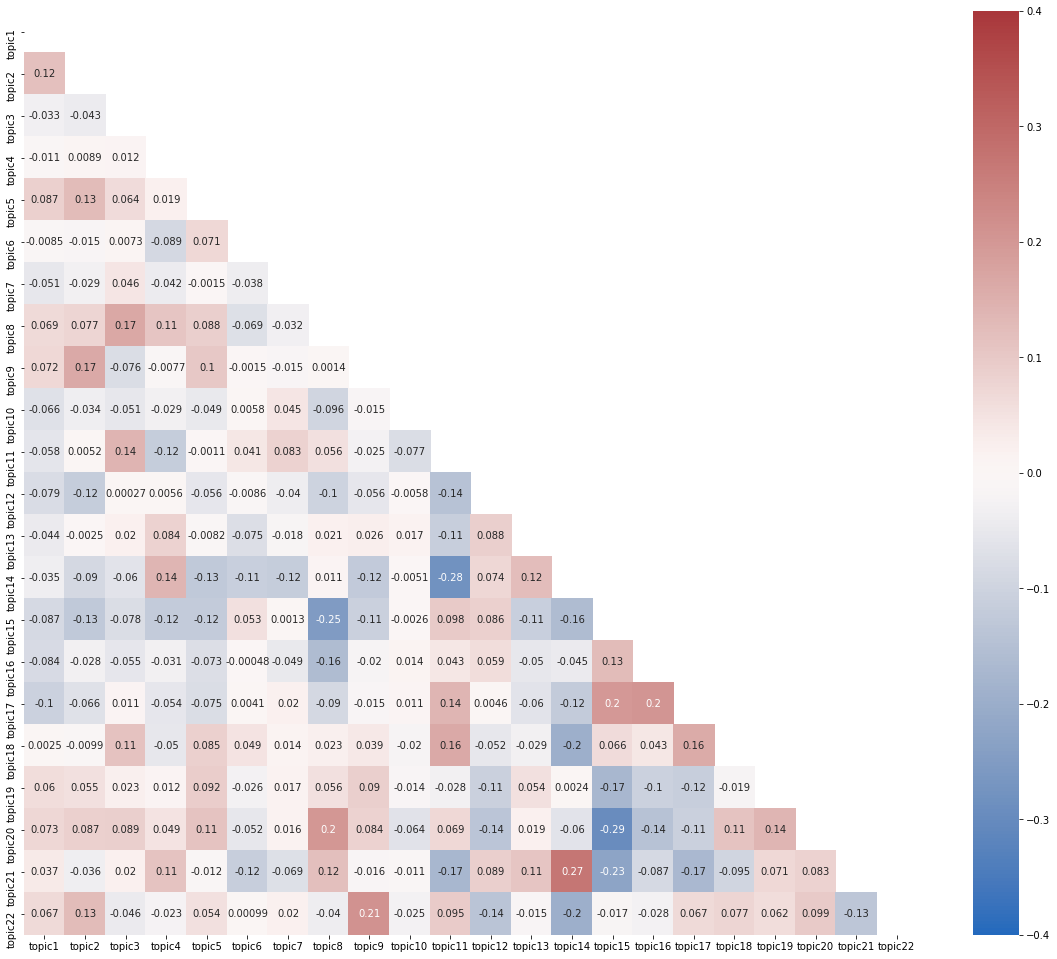

<Figure size 1440x1224 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

correldf = pd.DataFrame(correl,columns=['topic1','topic2','topic3', 'topic4','topic5','topic6', 'topic7','topic8','topic9', 'topic10',
                                       'topic11','topic12','topic13', 'topic14','topic15','topic16', 'topic17','topic18','topic19', 'topic20', 'topic21', 'topic22'],
                       index=['topic1','topic2','topic3', 'topic4','topic5','topic6', 'topic7','topic8','topic9', 'topic10',
                                       'topic11','topic12','topic13', 'topic14','topic15','topic16', 'topic17','topic18','topic19', 'topic20', 'topic21', 'topic22'])

corrMatrix = correldf
plt.rcParams["figure.figsize"]=(20,17)

mask = np.triu(np.ones_like(corrMatrix, dtype=np.bool))
sn.heatmap(corrMatrix, vmin=-0.4, vmax=0.4, mask=mask, annot=True, cmap="vlag")
plt.show()
plt.savefig("tomotopy_corrmatrix.png", dpi=200)

In [ ]:
correldf

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,...,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic20,topic21,topic22
topic1,1.000000,0.116211,-0.032694,-0.010589,0.087007,-0.008475,-0.051363,0.068549,0.071834,-0.065816,...,-0.043864,-0.035166,-0.086671,-0.084092,-0.104084,0.002521,0.060471,0.073109,0.036538,0.066559
topic2,0.116211,1.000000,-0.043167,0.008867,0.127838,-0.015345,-0.028981,0.076824,0.165335,-0.034481,...,-0.002531,-0.090445,-0.127399,-0.028495,-0.065954,-0.009892,0.055396,0.087293,-0.036458,0.126374
topic3,-0.032694,-0.043167,1.000000,0.012203,0.063634,0.007268,0.046060,0.168225,-0.075592,-0.051443,...,0.020306,-0.060495,-0.077683,-0.055045,0.011445,0.113364,0.023020,0.088953,0.019908,-0.045653
topic4,-0.010589,0.008867,0.012203,1.000000,0.018885,-0.088554,-0.042498,0.108688,-0.007655,-0.028528,...,0.084136,0.137809,-0.121554,-0.030727,-0.053581,-0.050200,0.011755,0.049418,0.110379,-0.022693
topic5,0.087007,0.127838,0.063634,0.018885,1.000000,0.071087,-0.001473,0.087713,0.102768,-0.048927,...,-0.008233,-0.127569,-0.120777,-0.072879,-0.075465,0.085080,0.091657,0.110163,-0.011759,0.054003
topic6,-0.008475,-0.015345,0.007268,-0.088554,0.071087,1.000000,-0.037906,-0.068946,-0.001467,0.005778,...,-0.074706,-0.110175,0.053231,-0.000485,0.004096,0.049192,-0.025848,-0.051708,-0.115123,0.000988
topic7,-0.051363,-0.028981,0.046060,-0.042498,-0.001473,-0.037906,1.000000,-0.031537,-0.015488,0.044808,...,-0.017655,-0.118332,0.001338,-0.048794,0.020186,0.013933,0.017445,0.016353,-0.069108,0.019933
topic8,0.068549,0.076824,0.168225,0.108688,0.087713,-0.068946,-0.031537,1.000000,0.001424,-0.095916,...,0.021208,0.011064,-0.251007,-0.159451,-0.090021,0.023444,0.055652,0.202604,0.119766,-0.039759
topic9,0.071834,0.165335,-0.075592,-0.007655,0.102768,-0.001467,-0.015488,0.001424,1.000000,-0.015374,...,0.026057,-0.124748,-0.108881,-0.020431,-0.015445,0.039201,0.089697,0.083870,-0.015551,0.211323
topic10,-0.065816,-0.034481,-0.051443,-0.028528,-0.048927,0.005778,0.044808,-0.095916,-0.015374,1.000000,...,0.016549,-0.005064,-0.002578,0.013529,0.011245,-0.019506,-0.014477,-0.063946,-0.010612,-0.025014


In [ ]:
positive=0
negative=0
for i in range(22):
    for j in range(22):
        if correldf.iloc[i,j]>0:
            positive+=1
        elif correldf.iloc[i,j]<0:
            negative+=1

        

In [ ]:
print(positive, negative)

236 248


In [ ]:
top_tenth = mdl.k * (mdl.k - 1) // 10
top_tenth = correl[-mdl.k - top_tenth]
top_tenth

0.11016306

In [ ]:
# 학습된 결과를 시각화 합니다.
from pyvis.network import Network 

g = Network(width=800, height=800, font_color="#333")
correl = mdl.get_correlations().reshape([-1])
correl.sort()
 
# 상관계수 상위10프로만 간선으로 잇습니다.
top_tenth = mdl.k * (mdl.k - 1) // 10
top_tenth = correl[-mdl.k - top_tenth]

topic_counts = mdl.get_count_by_topics()
 
for k in range(mdl.k):
    label = "Topic{}".format(k+1)
    title= ' '.join(word for word, _ in mdl.get_topic_words(k, top_n=8))
    print('Topic', label, title)
    g.add_node(k, label=label, title=title, shape='ellipse', value=float(topic_counts[k]))
    for l, correlation in zip(range(k - 1), mdl.get_correlations(k)):
        if abs(correlation) < top_tenth: continue
        elif correlation<-top_tenth:
            g.add_edge(k, l, value=abs(float(correlation)), title='{:.02}'.format(correlation), color="#688CBE")  
        elif correlation > top_tenth:
            g.add_edge(k, l, value=abs(float(correlation)), title='{:.02}'.format(correlation), color="#B95B5A")
#    for l, correlation in zip(range(k - 1), mdl.get_correlations(k)):
#        if abs(correlation) < 0.1: continue
#        elif correlation>0.1:
#            g.add_edge(k, l, value=abs(float(correlation)), title='{:.02}'.format(correlation), color="#B95B5A")
#        elif correlation<-0.1:
#            g.add_edge(k, l, value=abs(float(correlation)), title='{:.02}'.format(correlation), color="#688CBE")              
 
g.barnes_hut(gravity=-1000, spring_length=20)
g.show_buttons()
# 시각화 파일이 topic_network.html 이라는 이름으로 저장됩니다.
# 웹 브라우저로 열어서 확인해보세요.
g.show("topic_network(3).html")

Topic Topic1 girl everything fuck away hate many another probably
Topic Topic2 day tell not_want hurt let little stop know
Topic Topic3 lonely loneliness family leave not_friend real nice almost
Topic Topic4 come back night online past college job hour
Topic Topic5 try nothing same thing nobody good self cry
Topic Topic6 ever hard anymore conversation read life bit idk
Topic Topic7 person think meet sad close end share might
Topic Topic8 alone wish live move without today spend together
Topic Topic9 say long keep thing see best message friendship
Topic Topic10 bad way lot lose maybe time kind stuff
Topic Topic11 someone love care post not_feel miss hey quarantine
Topic Topic12 well month few last point ago feeling mind
Topic Topic13 work since hope week happen not_talk problem realize
Topic Topic14 school use call home become hang two high
Topic Topic15 find look help give others great interest music
Topic Topic16 talk start seem play game different anxiety sleep
Topic Topic17 time nee

각 토픽에 대해 해당 토픽을 가장 많이 포함한 문헌들을 묶어내기  
https://bab2min.tistory.com/641?category=686456

In [ ]:
# 먼저 토픽 개수만큼 공간을 만들어줍니다.
buckets = [[] for _ in range(mdl.k)]
# 전체 문헌에 대해, top 1 주제 번호를 찾아 그 그룹에 해당 문헌을 포함시킵니다.
for d in mdl.docs:
    buckets[d.get_topics(top_n=1)[0][0]].append(d)
 
# 이제 buckets[0] ~ buckets[k]에는 해당 토픽을 가장 많이 포함하고 있는 문헌들의 목록이 들어가 있습니다.

In [ ]:
for k in range(mdl.k):
    print('Num docs belonging to topic #%d: %d' % (k, len(buckets[k])))

Num docs belonging to topic #0: 1035
Num docs belonging to topic #1: 788
Num docs belonging to topic #2: 1312
Num docs belonging to topic #3: 601
Num docs belonging to topic #4: 753
Num docs belonging to topic #5: 618
Num docs belonging to topic #6: 601
Num docs belonging to topic #7: 843
Num docs belonging to topic #8: 540
Num docs belonging to topic #9: 405
Num docs belonging to topic #10: 916
Num docs belonging to topic #11: 335
Num docs belonging to topic #12: 389
Num docs belonging to topic #13: 382
Num docs belonging to topic #14: 375
Num docs belonging to topic #15: 548
Num docs belonging to topic #16: 511
Num docs belonging to topic #17: 422
Num docs belonging to topic #18: 331
Num docs belonging to topic #19: 390
Num docs belonging to topic #20: 329
Num docs belonging to topic #21: 360


In [ ]:
#비율
for k in range(mdl.k):
    n=len(buckets[k])
    percentage= round(float(n*100/12784),2)
    print(f"percentage of docs belonging to topic {k+1}: {percentage}")

percentage of docs belonging to topic 1: 8.1
percentage of docs belonging to topic 2: 6.16
percentage of docs belonging to topic 3: 10.26
percentage of docs belonging to topic 4: 4.7
percentage of docs belonging to topic 5: 5.89
percentage of docs belonging to topic 6: 4.83
percentage of docs belonging to topic 7: 4.7
percentage of docs belonging to topic 8: 6.59
percentage of docs belonging to topic 9: 4.22
percentage of docs belonging to topic 10: 3.17
percentage of docs belonging to topic 11: 7.17
percentage of docs belonging to topic 12: 2.62
percentage of docs belonging to topic 13: 3.04
percentage of docs belonging to topic 14: 2.99
percentage of docs belonging to topic 15: 2.93
percentage of docs belonging to topic 16: 4.29
percentage of docs belonging to topic 17: 4.0
percentage of docs belonging to topic 18: 3.3
percentage of docs belonging to topic 19: 2.59
percentage of docs belonging to topic 20: 3.05
percentage of docs belonging to topic 21: 2.57
percentage of docs belongi

In [ ]:
for d in buckets[21][0:40]:
    print(d)

<tomotopy.Document with words="link wagt neutral_emoji neutral_emoji need friend">
<tomotopy.Document with words="not_compete guy 21f talk girl not_much faith fact ghost every single girl try relationship still heavily attract not_stop think few day ago agree date coronavirus thing blow find two week old post tiktok fell guy recently not_compete men everything not_list quality not_want make post nsfw attractive men charm make girl swarm average look not_charm chance win douchebag slim accept second choice not_find relationship super attractive everyone see picture say lucky talk girl attractive maybe simp">
<tomotopy.Document with words="humph frustrated lack knowledge not_explain hell depressed not_reason want ask help not_ask feel like young feel way yet old act way people age 21 not_reason phone not_stay contact friend old people job stay texting phone fit open facebook take someone pas not_accidentally strike unwanted conversation feel alone yet act antisocial feel way time felt ha